CUSTOMER RETENTION DATASET
------

ASSUMPTION - WE WILL USE COLUMN NAMED['Which of the Indian online retailer would you recommend to a friend?'] TO FURTHER CREATE NEW COLUMNS NAMED [Flipkart_points,Amazon_points,Snapdeal_points,Myntra_points,Paytm_points] BECAUSE ANYONE WILL RECOMMEND ANY ONLINE STORE TO A FRIEND ONLY IF HE/SHE IS SATISFIED LEADING TO CUSTOMER RETENTION AS WELL AS NEW CUSTOMER AQUISTION/ACTIVATION THEREFORE WE ARE SELECTING THAT COLUMN AS KEY COLUMNS FOR GIVING THE POINTS IN NEWLY CREATED COLUMN WHICH WILL FURTHER BE USED FOR ML MODELLING 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

***********extracting the datasheet sheet from our  modified excel workbook which contains extra columns [Flipkart_points,Amazon_points,Snapdeal_points,Myntra_points,Paytm_points]

In [2]:
df=pd.read_excel('QWERT.xlsx',sheet_name='datasheet')

In [3]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

LIST OF COLUMN NAMES

In [4]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
lis=list(df.columns)

In [6]:
len(lis)

76

@@@@SHAPE OF DATASET@@@@@@

In [7]:
df.shape

(269, 76)

WE GOT 269 ROWS AND 76 COLUMNS IN THE DATASET

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 76 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

DATASET CONTAINS OBJECTS AND INT64 data types

CHECKING FOR THE NULL IN THE DATASET

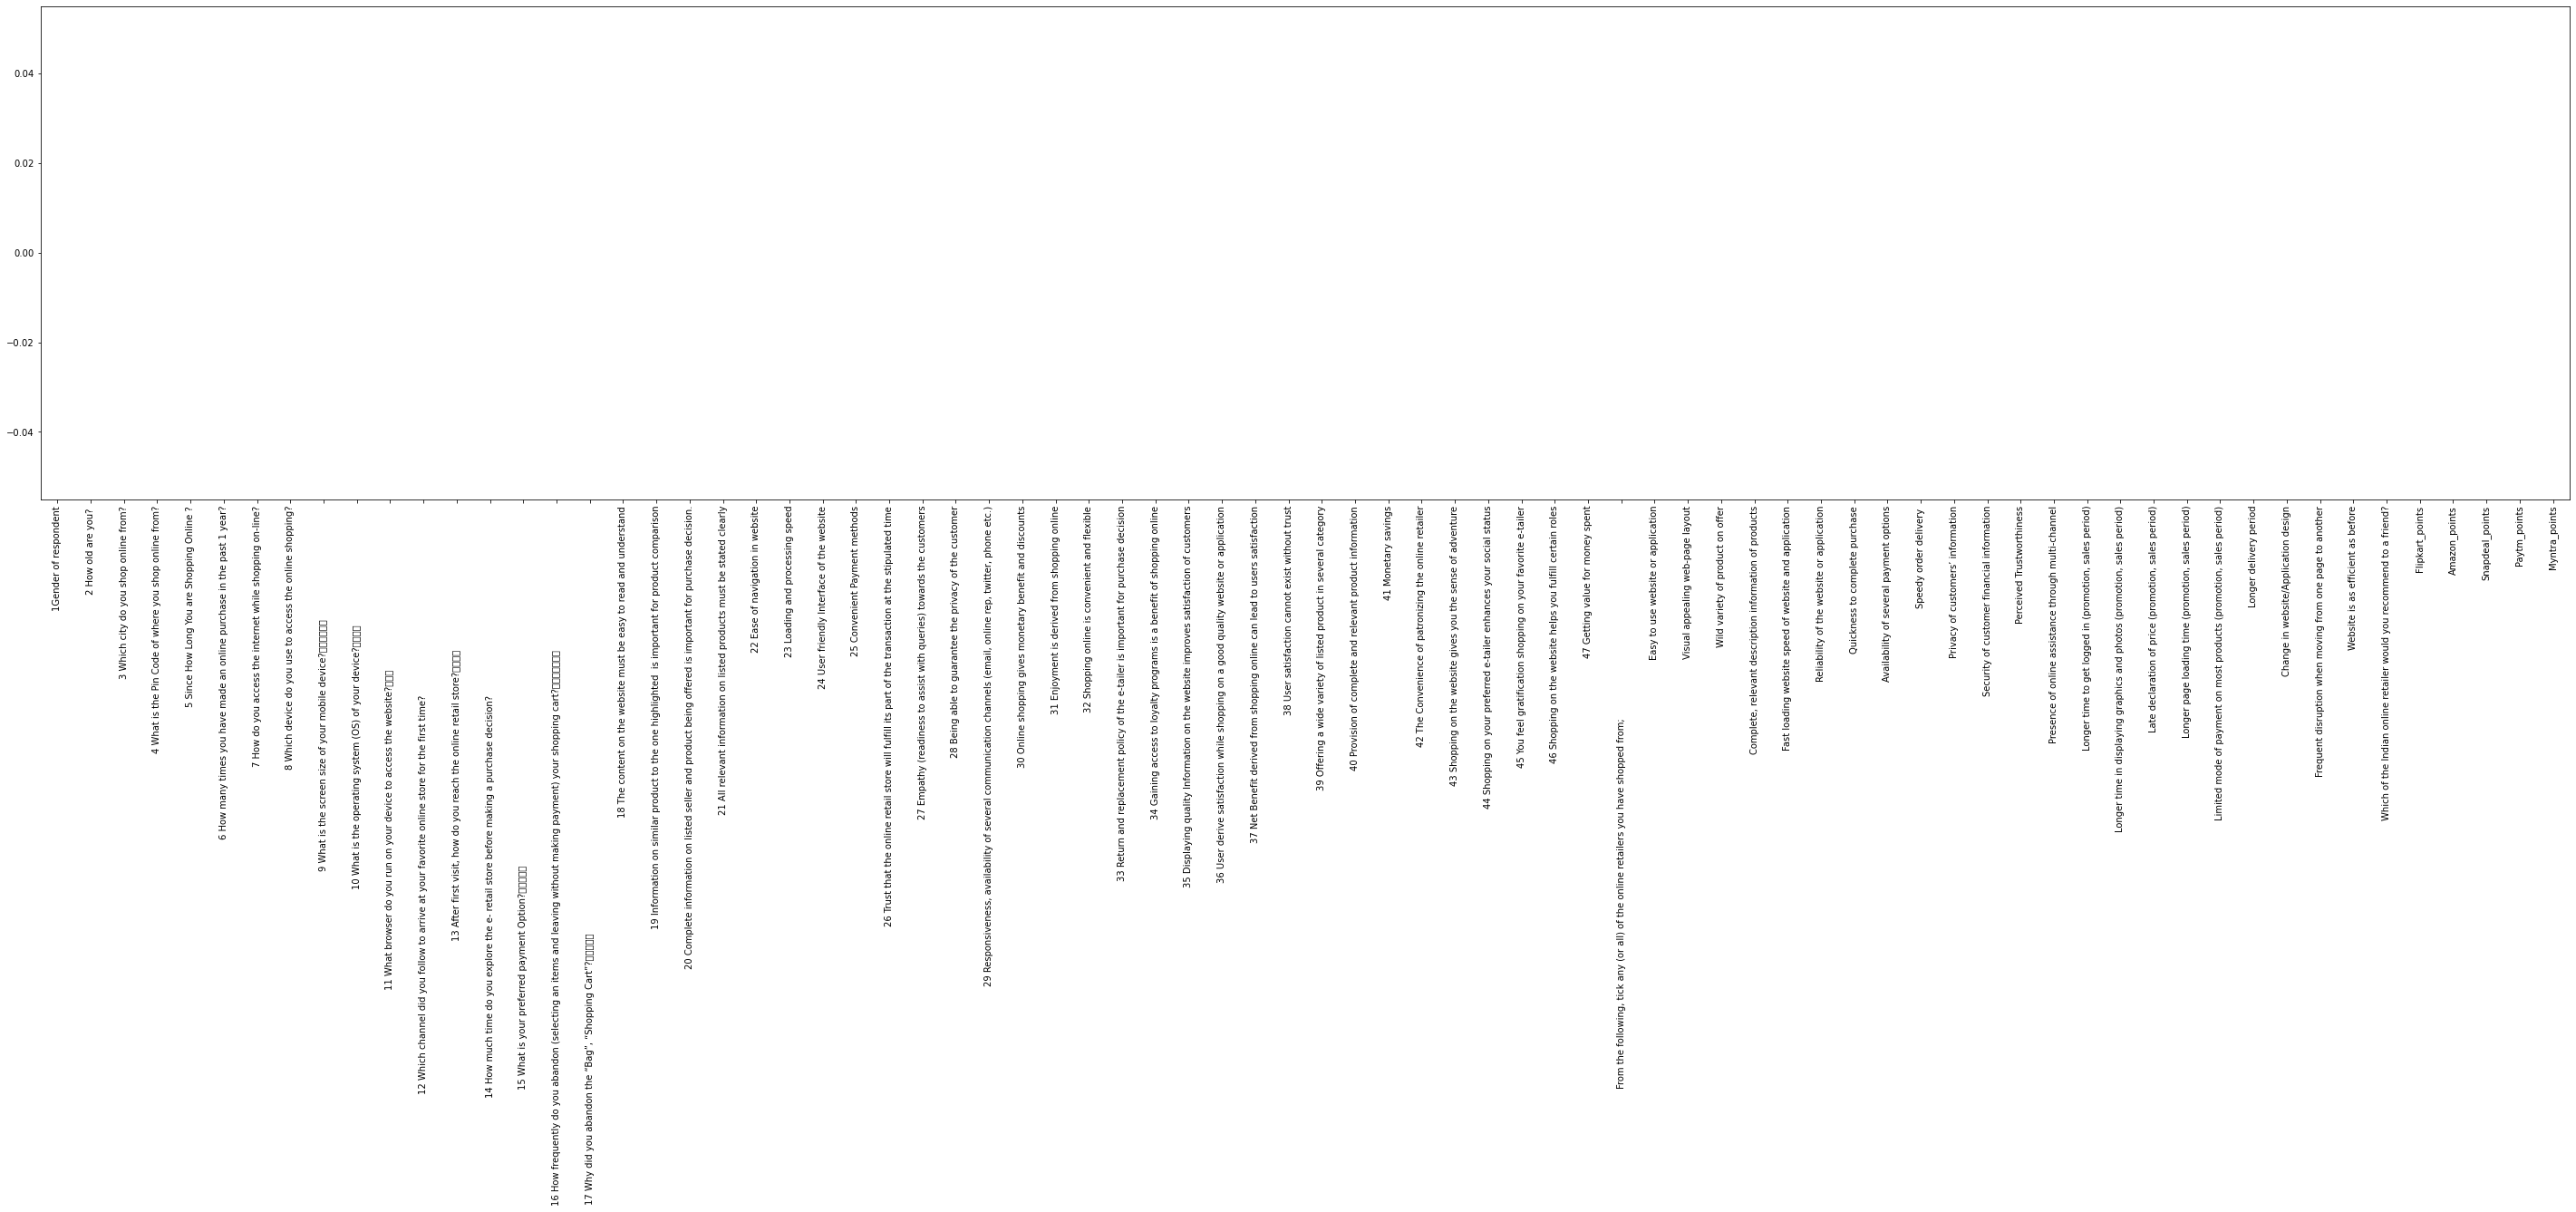

In [9]:
plt.figure(figsize=(50,10))
df.isnull().sum().plot(kind='bar')
plt.show()

In [10]:
df.isnull().sum()

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

HENCE WE CAN CONCLUDE THAT BOTH NONE OF COLUMNS HAVE A SINGLE NULL IN THEM AND OUR DATSET IS HEALTHY IS TERMS OF NULLS

APPENDING ALL THE CATEGORICAL COLUMNS IN A NEW LIST CAT 

In [11]:
cat=[]
for i in lis:
    if(df[i].dtype!='object'):
        pass
    else:
        cat.append(i)

In [12]:
cat

['1Gender of respondent',
 '2 How old are you? ',
 '3 Which city do you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
 '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
 '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
 '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
 '14 How much time do you expl

In [13]:
len(cat)
col_name=[]
total=[]
uni_cat=[]

CREATING A DATAFRAME OF CATEGORICAL COLUMNS WHICH CONTAINS--<br>
COLUMN_NAME<br>
TOTAL UNIQUE CATEGORIES<br>
UNIQUE CATEGORIES OF THAT COLUMN<br>

In [14]:
def uni():
    print("\\\\**********APPENDING  ALL THE UNIQUE VALUES INFORMATION IN EACH CATEGORICAL COLUMN OF THE DATASET IN RESPECTIVE LISTS**********\n\n\n ")
    for i in cat:
        col_name.append(i)
        total.append(len(df[i].unique()))
        uni_cat.append([[j] for j in df[i].unique()])
        
        
        

In [15]:
uni()

\\**********APPENDING  ALL THE UNIQUE VALUES INFORMATION IN EACH CATEGORICAL COLUMN OF THE DATASET IN RESPECTIVE LISTS**********


 


In [16]:
info=pd.DataFrame({'COLUMN_NAME':col_name,"TOTAL UNIQUE CATEGORIESIN IN THAT COLUMN":total,"NAME OF UNIQUE CATEGORIES":uni_cat})

In [17]:
info

,COLUMN_NAME,TOTAL UNIQUE CATEGORIESIN IN THAT COLUMN,NAME OF UNIQUE CATEGORIES
0,1Gender of respondent,2,"[[Male], [Female]]"
1,2 How old are you?,5,"[[31-40 years], [21-30 years], [41-50 yaers], [Less than 20 years], [51 years and above]]"
2,3 Which city do you shop online from?,11,"[[Delhi], [Greater Noida], [Karnal ], [Bangalore ], [Noida], [Solan], [Moradabad], [Gurgaon ], [Merrut], [Ghaziabad], [Bulandshahr]]"
3,5 Since How Long You are Shopping Online ?,5,"[[Above 4 years], [3-4 years], [2-3 years], [Less than 1 year], [1-2 years]]"
4,6 How many times you have made an online purchase in the past 1 year?,6,"[[31-40 times], [41 times and above], [Less than 10 times], [11-20 times], [21-30 times], [42 times and above]]"
5,7 How do you access the internet while shopping on-line?,4,"[[Dial-up], [Wi-Fi], [Mobile Internet], [Mobile internet]]"
6,8 Which device do you use to access the online shopping?,4,"[[Desktop], [Smartphone], [Tablet], [Laptop]]"
7,9 What is the screen size of your mobile device?\t\t\t\t\t\t,4,"[[Others], [4.7 inches], [5.5 inches], [5 inches]]"
8,10 What is the operating system (OS) of your device?\t\t\t\t,3,"[[Window/windows Mobile], [IOS/Mac], [Android]]"
9,11 What browser do you run on your device to access the website?\t\t\t,4,"[[Google chrome], [Safari], [Opera], [Mozilla Firefox]]"


OBSERVATIONS 
------------

COUNT OF MALES AND FEMALES INDULGING IN ONLINE SHOPPING PORTALS BASED ON THE DATSET

CODE FOR DISPLAYING THE PERCENTAGES FOR PLOTS HAVING HUE AND NOT HAVING HUE

In [18]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 20)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 20)

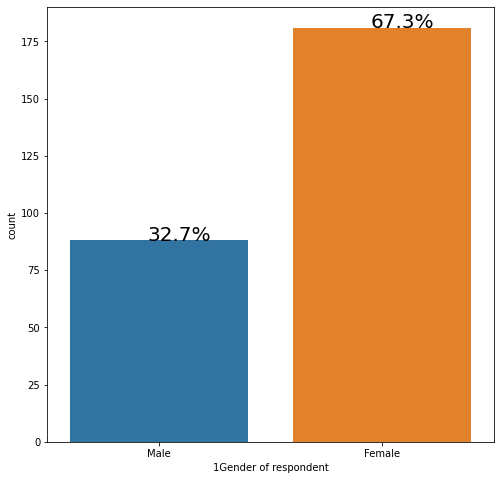

In [19]:
plt.figure(figsize=(8,8))
ax=sns.countplot(df['1Gender of respondent'])
without_hue(ax,df['1Gender of respondent'])
plt.savefig("asd")
plt.show()

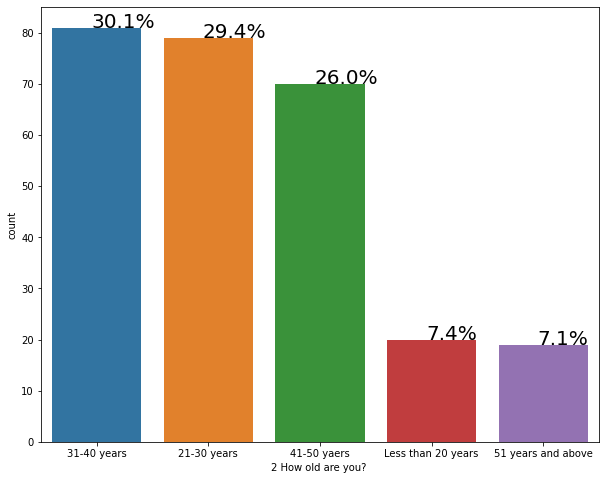

In [20]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['2 How old are you? '])
without_hue(ax,df['2 How old are you? '])
plt.savefig("asf")
plt.show()

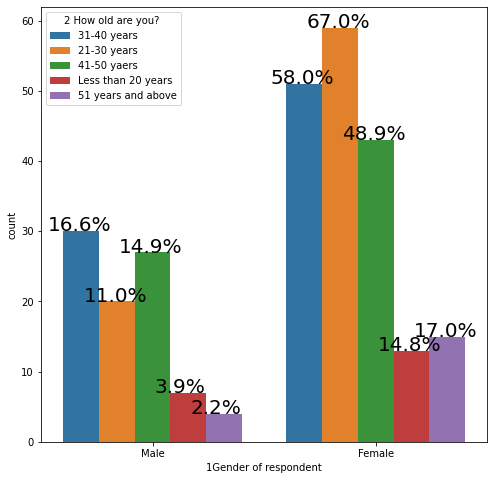

In [21]:
plt.figure(figsize=(8,8))
ax=sns.countplot(df['1Gender of respondent'],hue=df['2 How old are you? '])
with_hue(ax,df['1Gender of respondent'],2,5)
plt.savefig("aaa")
plt.show()

AS WE CAN SEE A COMAPARED TO MALES FEMALES ARE MUCH MORE ACTIVE WHEN COMES TO ONLINE SHOPPING <br>
females of the age between 21-30 year have highest numbers when it comes to shopping online than the people between 31-40 years following 41-50 age group and the least being for less than 20 years and above 51 years<br>
IN BOYS CATEGORY<br>
boys in the age group 31-40 are having maximum number of customers 

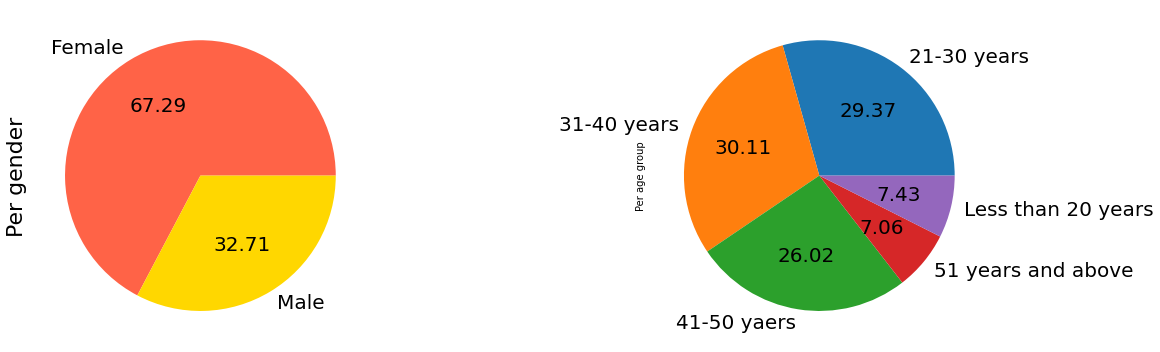

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
df.groupby('1Gender of respondent').size().plot(kind='pie',autopct='%.2f', textprops={'fontsize': 20},
                                  colors=['tomato', 'gold',], ax=ax1)
df.groupby('2 How old are you? ').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20},ax=ax2)
ax1.set_ylabel('Per gender', size=22)
ax2.set_ylabel('Per age group', size=10)
plt.tight_layout()
plt.show()

PLOTTING A COUNT PLOT FOR POPULATION OF PEOPLE FROM A PARTICULAR CITY 

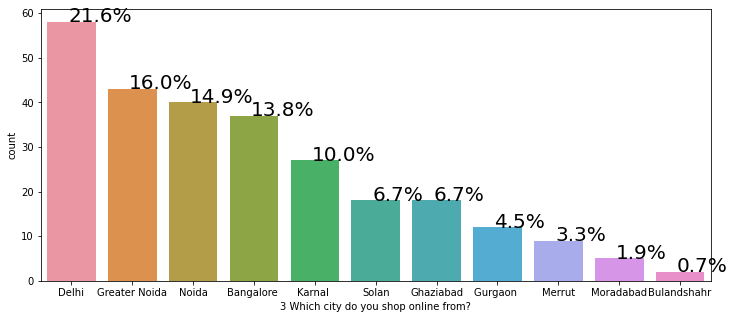

In [23]:
plt.figure(figsize=(12,5))
ax=sns.countplot(df['3 Which city do you shop online from?'],order=df['3 Which city do you shop online from?'].value_counts().index)
without_hue(ax,df['3 Which city do you shop online from?'])
plt.savefig("xx")
plt.show()

AS WE CAN SEE MAXIMUM NUMBER OF CUSTOMERS ARE FROM DELHI FOLLOWED GREATER NOIDA THAN NOIDA
    

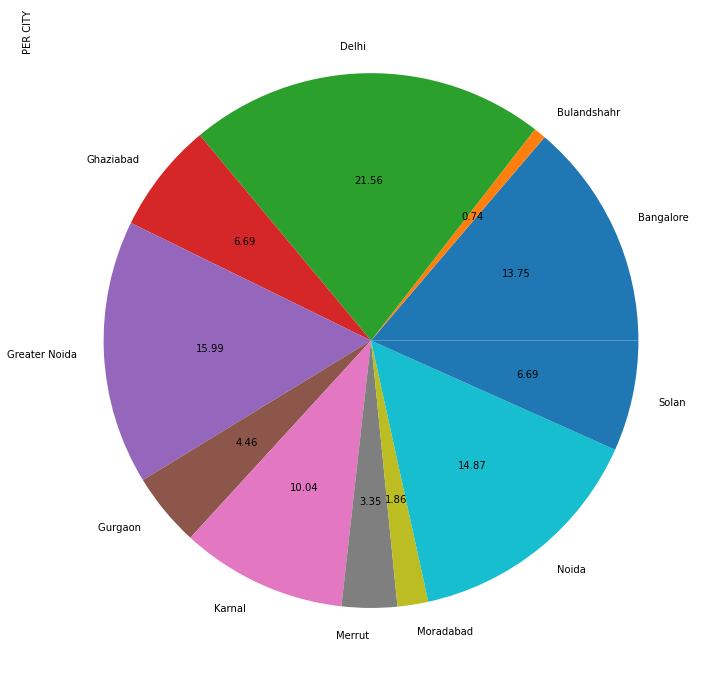

In [24]:
fig,ax1=plt.subplots(ncols=1,nrows=1,figsize=(10,10))
df.groupby('3 Which city do you shop online from?').size().plot(kind='pie',autopct='%.2f', textprops={'fontsize': 10},ax=ax1)
ax1.set_ylabel('PER CITY ',loc='top')
plt.tight_layout()
plt.savefig('gig')
plt.show()

THE PEOPLE WHO SHOPPED MORE WERE LYING IN CATEGORY OF SHOPPED MORE THAN 4 YEARS CATEGORY

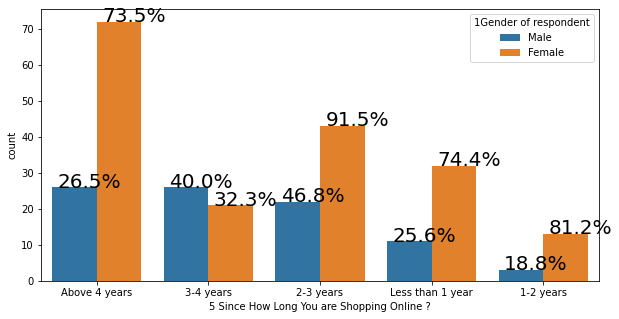

In [25]:
plt.figure(figsize=(10,5))
ax=sns.countplot(df['5 Since How Long You are Shopping Online ?'],hue=df['1Gender of respondent'])
with_hue(ax,df['5 Since How Long You are Shopping Online ?'],5,2)
plt.savefig('ioo')
plt.show()

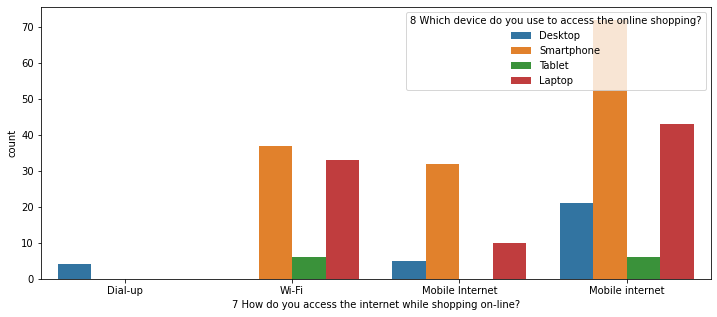

In [26]:
plt.figure(figsize=(12,5))
ax=sns.countplot(df['7 How do you access the internet while shopping on-line?'],hue=df['8 Which device do you use to access the online shopping?'])
plt.savefig('ee')
plt.show()

MOST OF THE CUSTOMERS DEPENDS ON MOBILE INTERNET TO ACCESS THE ONLINE STORES AND THAT TOO ON THE SMART PHONES FOLLOWING WIFI AND STILL USING THE SMART PHONES

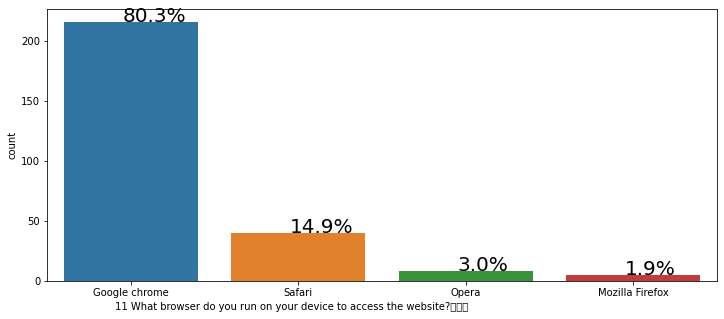

In [27]:
plt.figure(figsize=(12,5))
ax=sns.countplot(df['11 What browser do you run on your device to access the website?\t\t\t                                                          '])
without_hue(ax,df['11 What browser do you run on your device to access the website?\t\t\t                                                          '])
plt.savefig('qwe')
plt.show()

GOOGLE CHROME IS THE MOST USED BROWSER WHEN IT COMES TO A BROWSER WHICH IS WIDELY USED BY THE CUSTOMERS

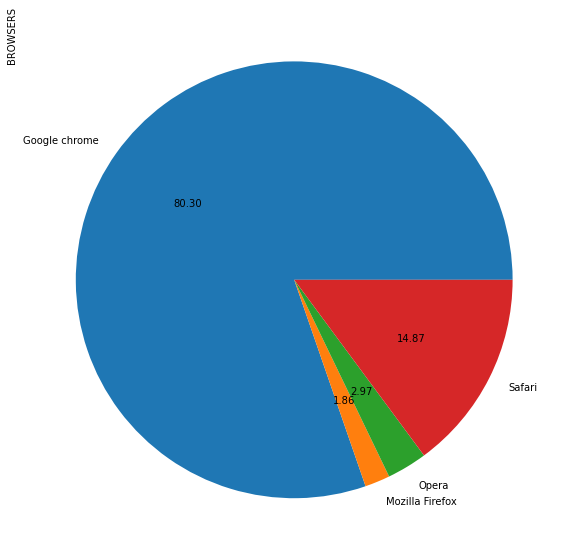

In [28]:
fig,ax1=plt.subplots(nrows=1,ncols=1,figsize=(8,8))
df.groupby('11 What browser do you run on your device to access the website?\t\t\t                                                          ').size().plot(kind='pie',autopct='%.2f',ax=ax1,textprops={'fontsize': 10})
ax1.set_ylabel('BROWSERS',loc='top')
plt.tight_layout()
plt.show()

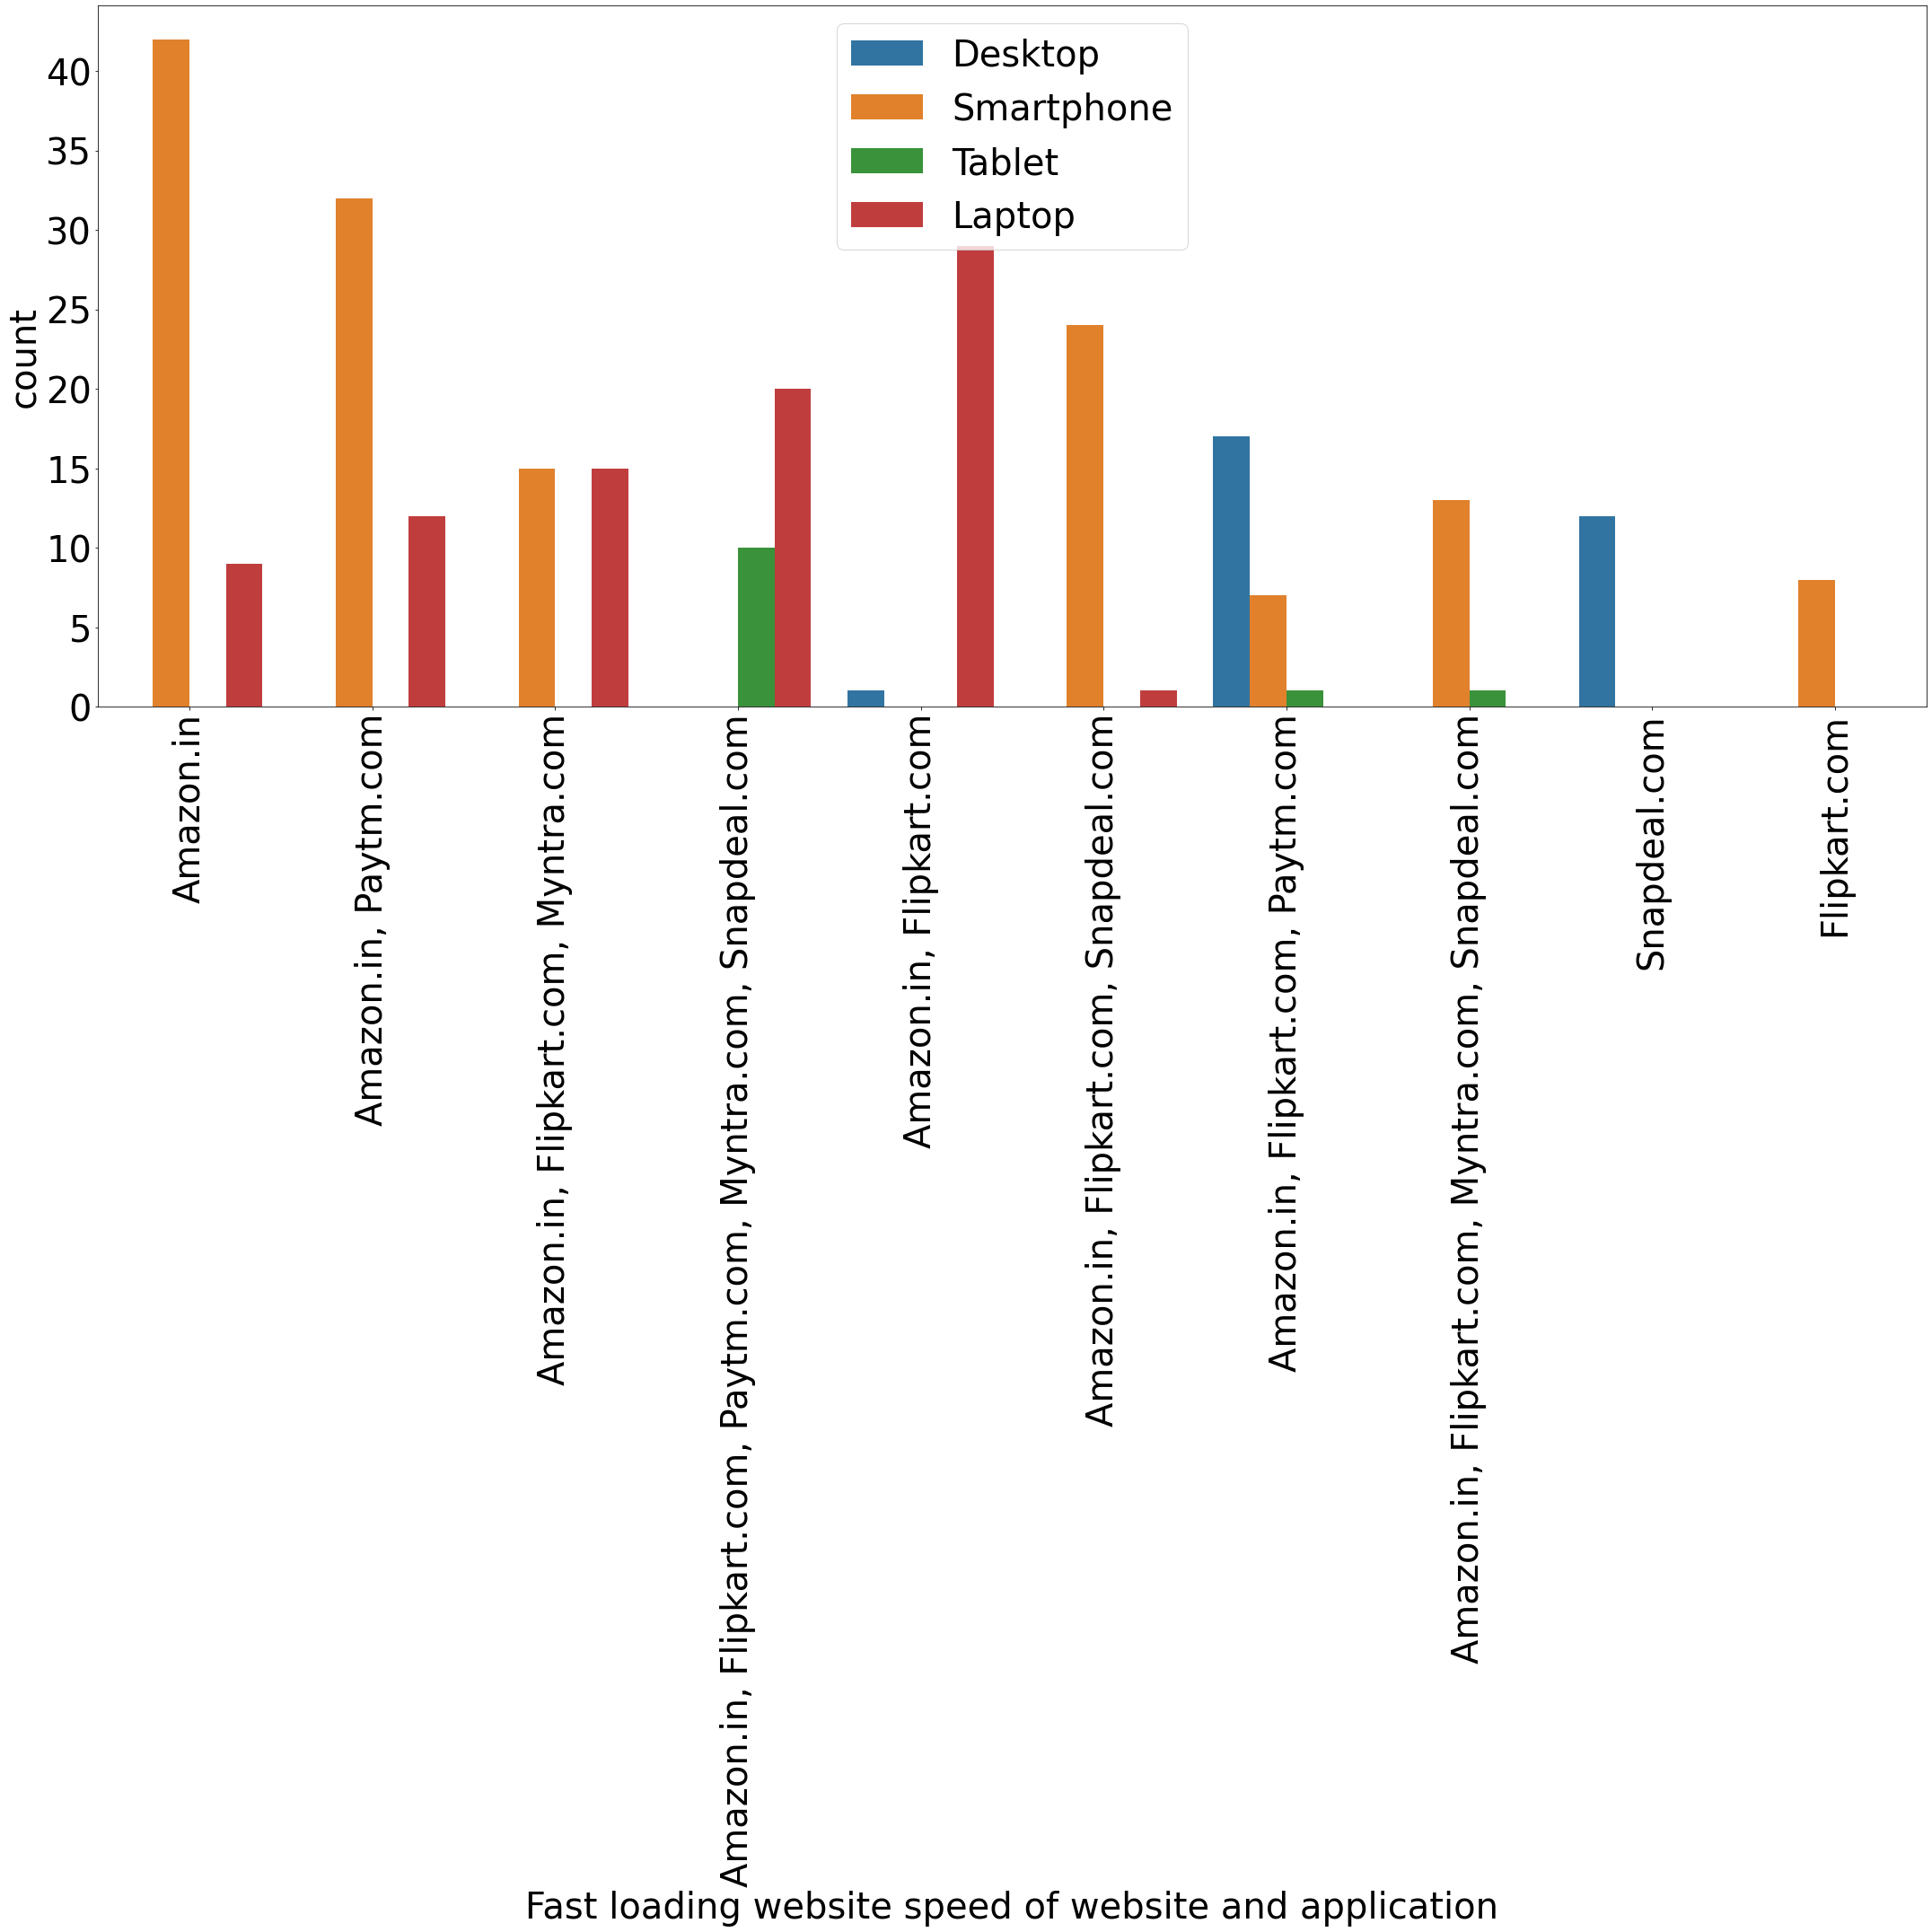

In [29]:
plt.figure(figsize=(30,30))
plt.xticks(size=40,rotation=90)
plt.yticks(size=40)
plt.ylabel("count",fontsize=40)
plt.xlabel("Fast loading website speed of website and application",fontsize=40)
sns.countplot(df['Fast loading website speed of website and application'],hue=df['8 Which device do you use to access the online shopping?'],order=df['Fast loading website speed of website and application'].value_counts().index)
plt.legend(fontsize=40)
plt.tight_layout()
plt.savefig('aqqq')
plt.show()

ACCORDING TO CUSTOMERS AMAZON HAVE A FAST LOADING WEBSITE SPEED AND APPLICATION

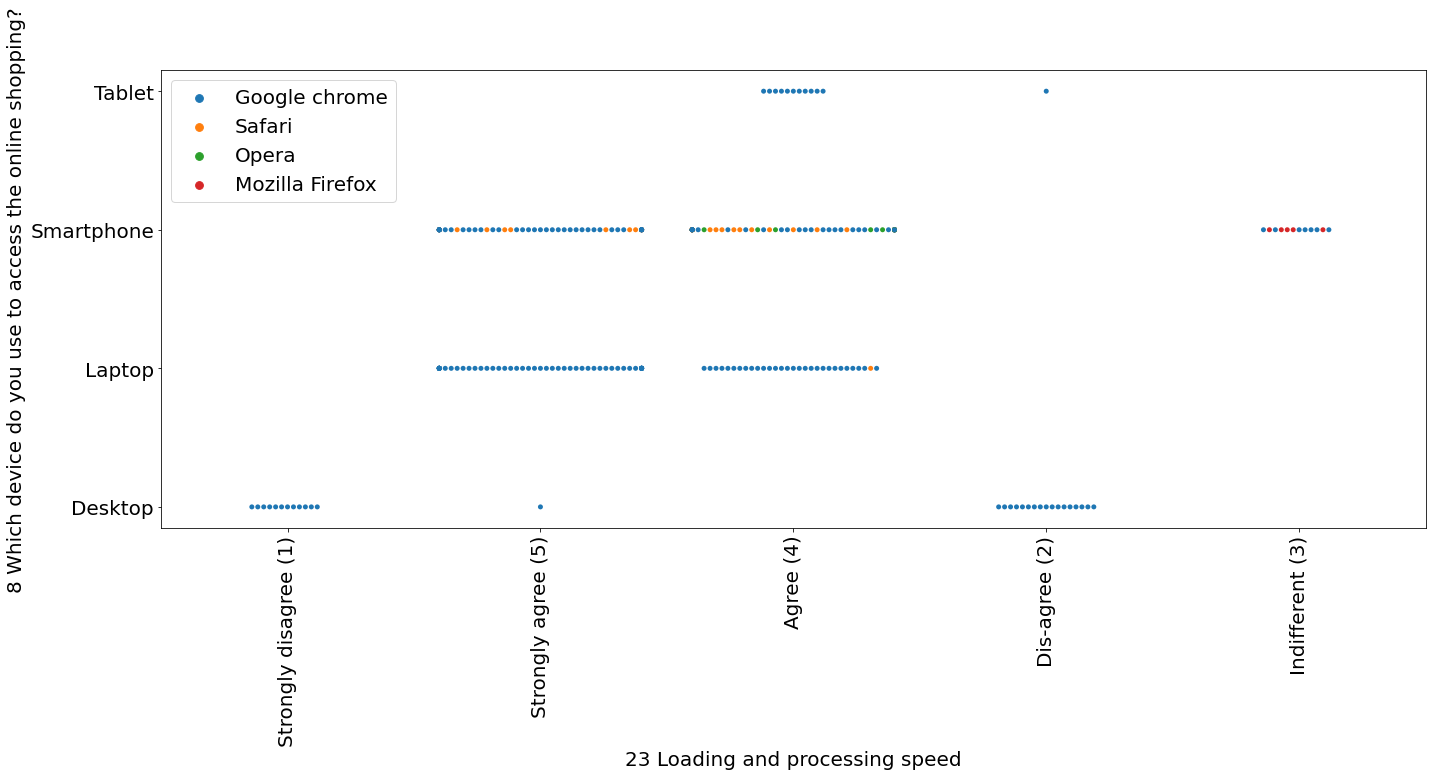

In [30]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('8 Which device do you use to access the online shopping?',fontsize=20)
plt.xlabel('23 Loading and processing speed',fontsize=20)
sns.swarmplot(df['23 Loading and processing speed'],y=df['8 Which device do you use to access the online shopping?'],hue=df['11 What browser do you run on your device to access the website?\t\t\t                                                          '])
plt.legend(fontsize=20,loc='upper left')
plt.tight_layout()
plt.savefig('lll')
plt.show()

LOADING SPEEDS IN SMARTPHONES ARE HIGH AS PER THE PLOT AND SLOW WHEN IT COMES TO DESKTOP

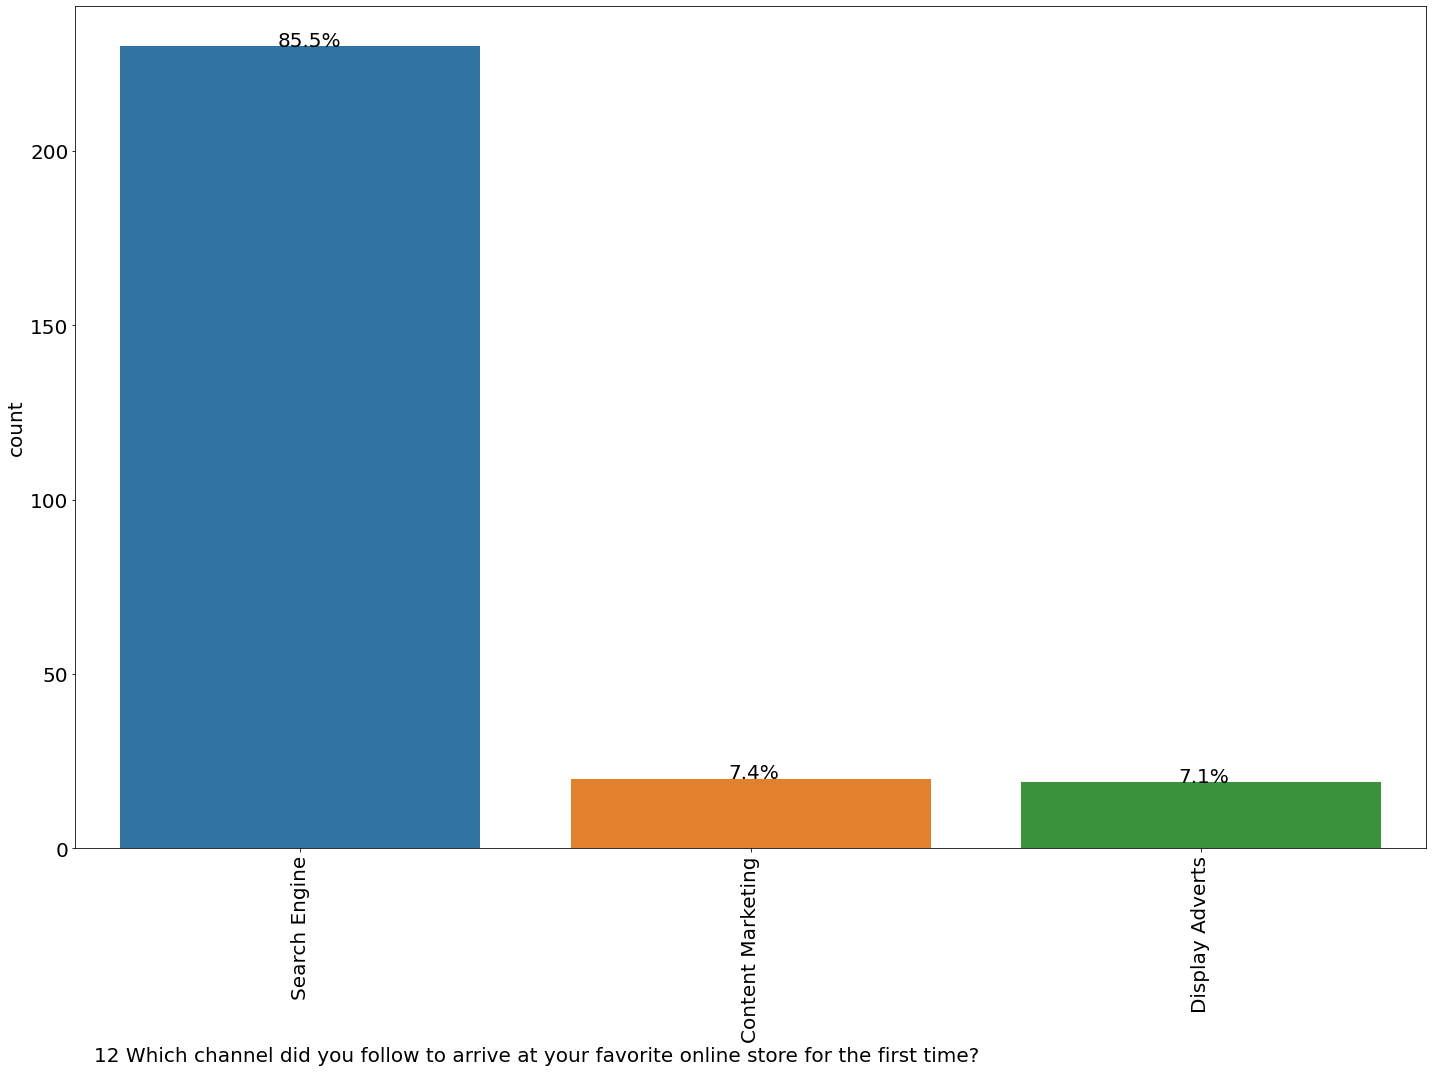

In [31]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.ylabel("count",fontsize=20)
plt.xlabel('12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',fontsize=20)
ax=sns.countplot(df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '])
without_hue(ax,df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '])
plt.tight_layout()
plt.savefig('kjk')
plt.show()

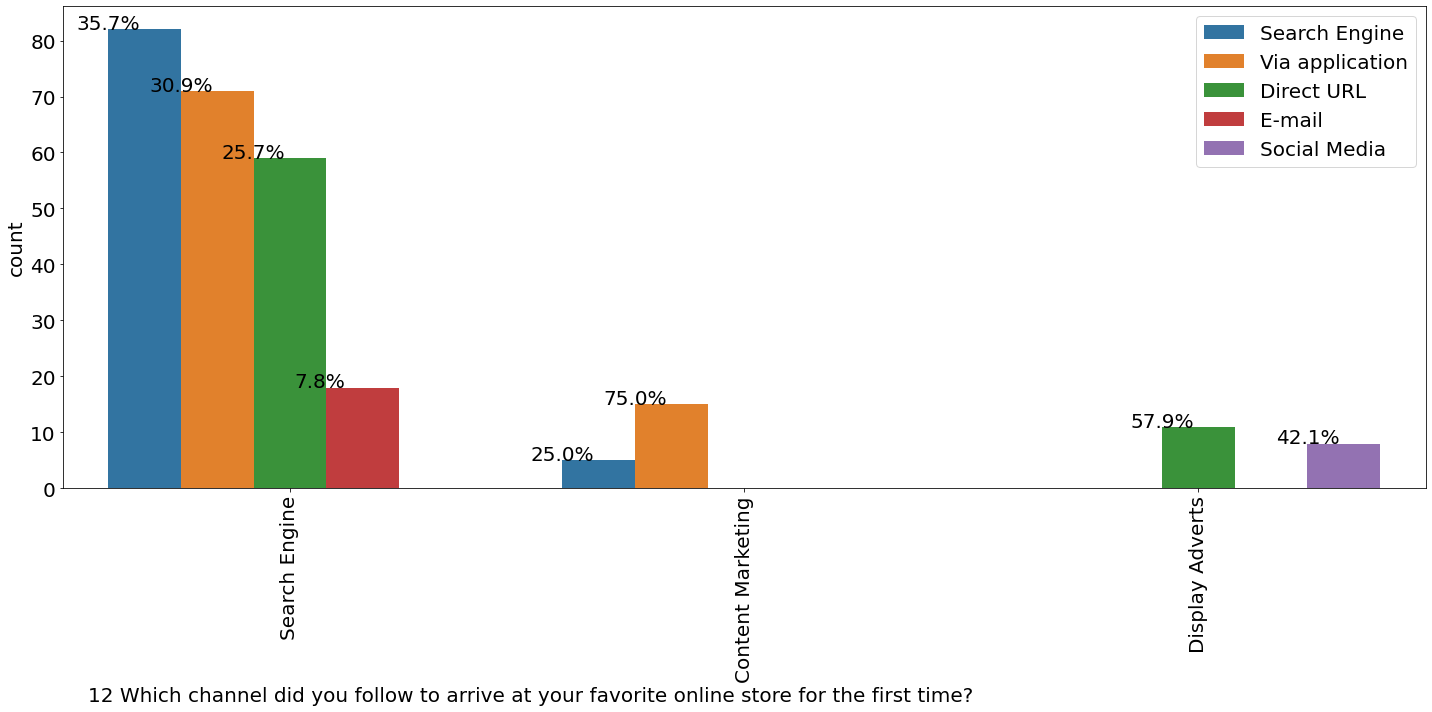

In [32]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.ylabel("count",fontsize=20)
plt.xlabel('12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',fontsize=20)
ax=sns.countplot(df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '],hue=df['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '])
with_hue(ax,df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '],3,5)
plt.legend(fontsize=20,loc="best")
plt.tight_layout()
plt.savefig('hrh')
plt.show()

SEARCH ENGINE REMAINS THE TOP CHOICE FOR ARRIVING AT THE STORE FOR THE FIRST TIME AND AFTER IT TOO<BR>
    CONTENT MARKETING AND DISPLAY ADVERTS HELPS A BIT IN ENGAING NEW CUSTOMERS 

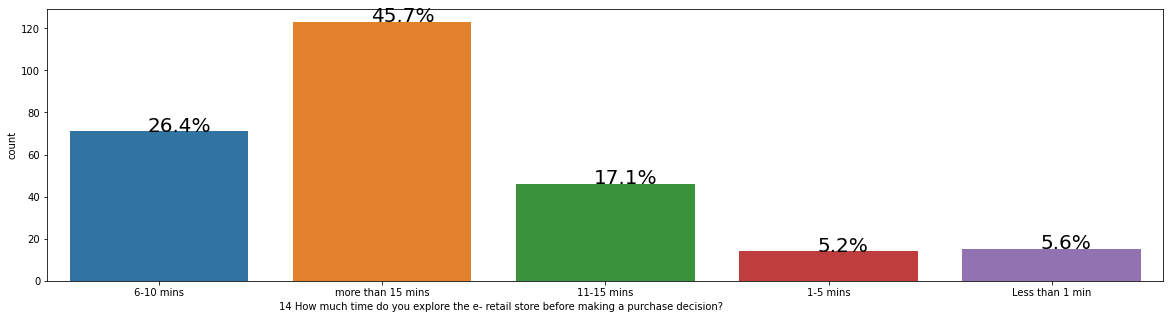

In [33]:
plt.figure(figsize=(20,5))
ax=sns.countplot(df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '])
without_hue(ax,df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '])
plt.savefig('ff')
plt.show()

BEFORE MAKING ANY PURCHASE FROM TH STORE MOST CUSTOMERS SPEND MORE THAN 15 MINS ON THE STORE

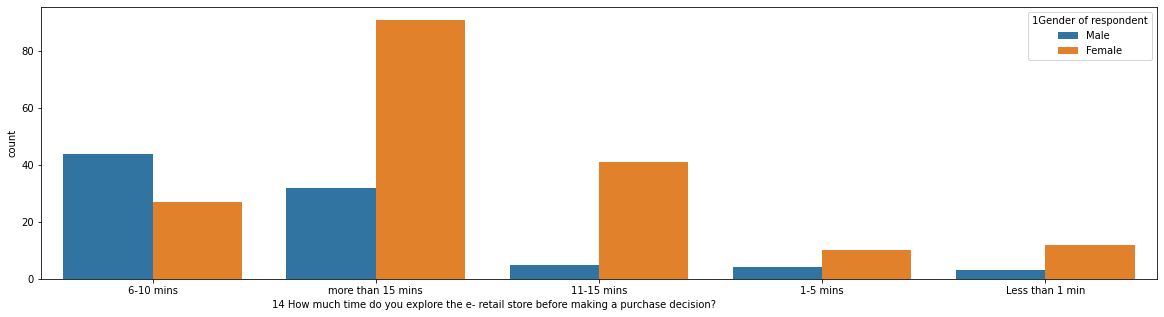

In [34]:
plt.figure(figsize=(20,5))
ax=sns.countplot(df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '],hue=df['1Gender of respondent'])
plt.savefig('dd')
plt.show()

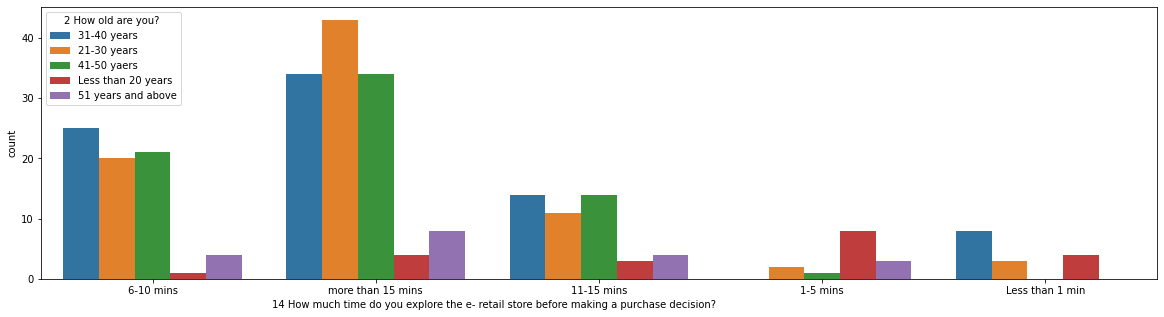

In [35]:
plt.figure(figsize=(20,5))
ax=sns.countplot(df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '],hue=df['2 How old are you? '])
plt.savefig('daa')
plt.show()

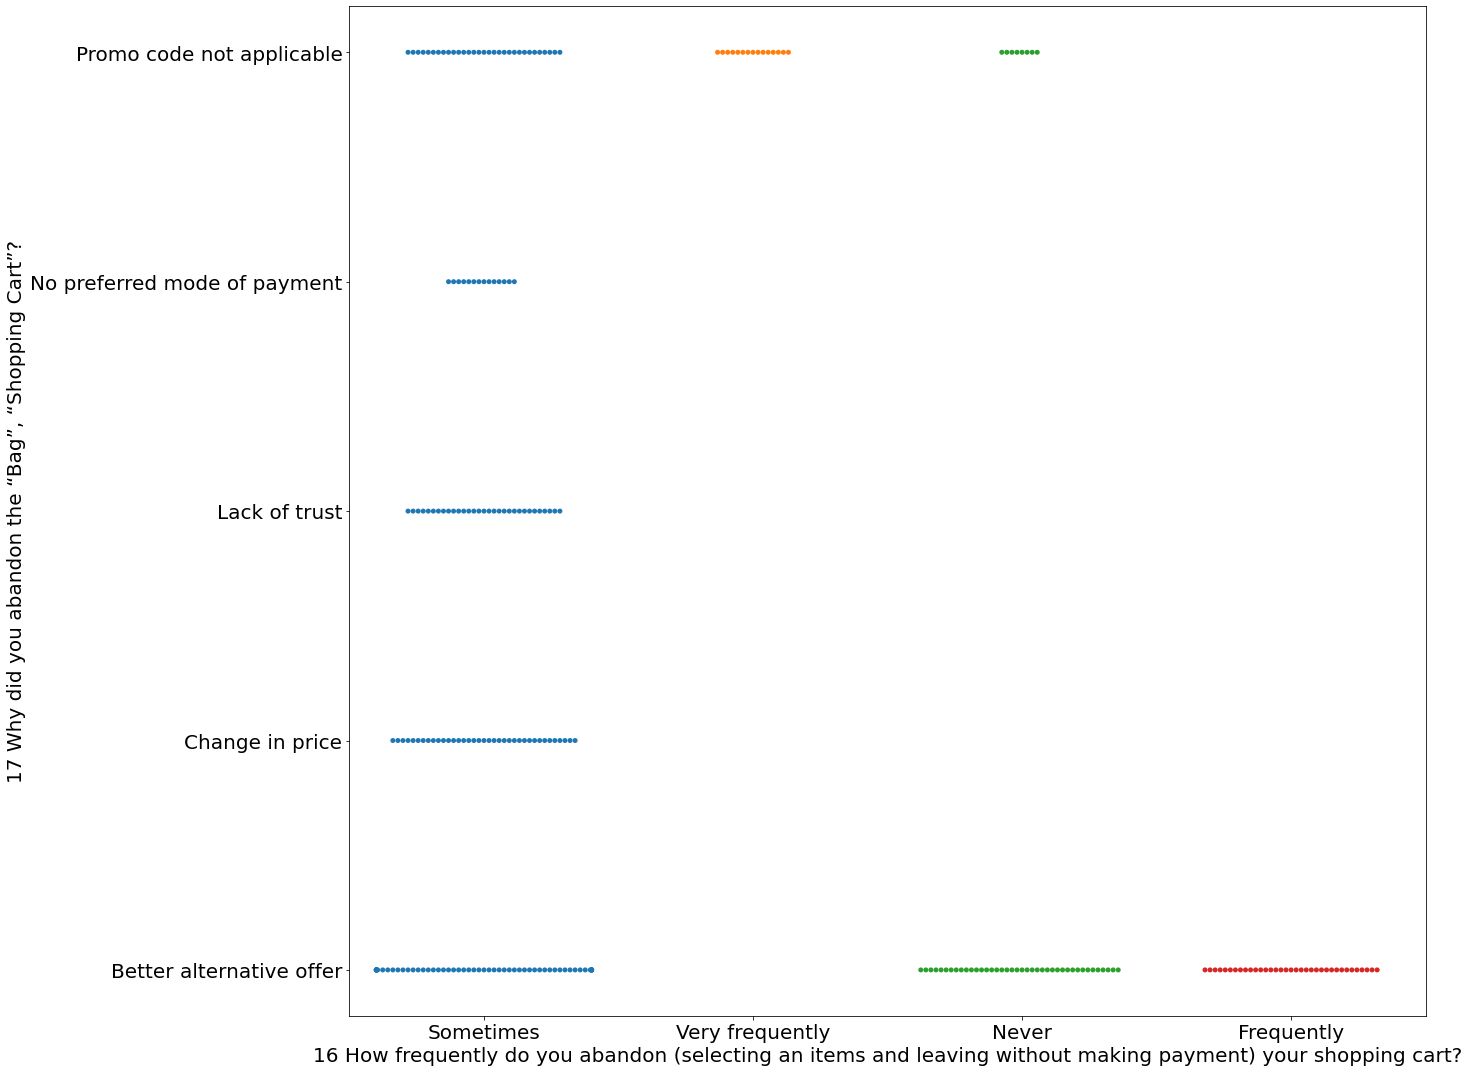

In [36]:
plt.figure(figsize=(20,15))
sns.swarmplot(x=df['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '],y=df['17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '])
plt.xlabel('16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',fontsize=20)
plt.ylabel("17 Why did you abandon the “Bag”, “Shopping Cart”?",fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()
plt.savefig('tr')
plt.show()

PEOPLE WHO VERY FREQUENTLY ABONDON THE BAG IS BECAUSE THE PROMO CODES ARE NOT WORKING

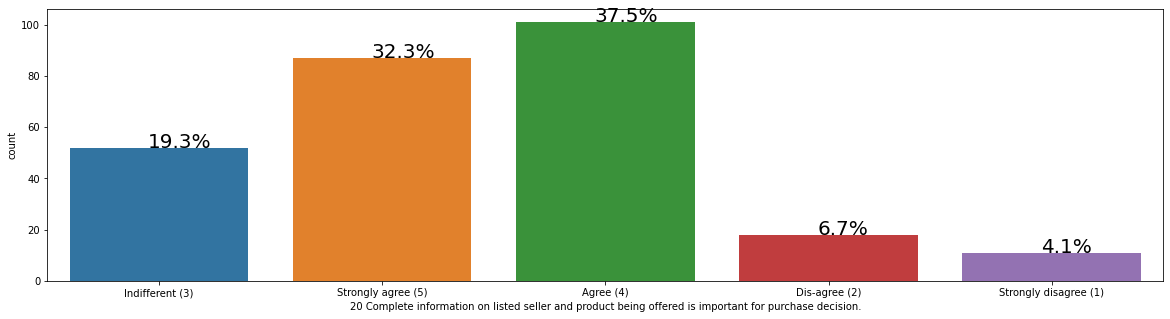

In [37]:
plt.figure(figsize=(20,5))
ax=sns.countplot(df['20 Complete information on listed seller and product being offered is important for purchase decision.'])
without_hue(ax,df['20 Complete information on listed seller and product being offered is important for purchase decision.'])
plt.savefig('zaq')
plt.show()

A MAJORITY OF PEOPLE AGREE THAT COMPLETE INFORMATON OF LISTED SELLER AND PRODUCT INFORMATION ARE IMPORTANT FOR PURCHSE DECISION

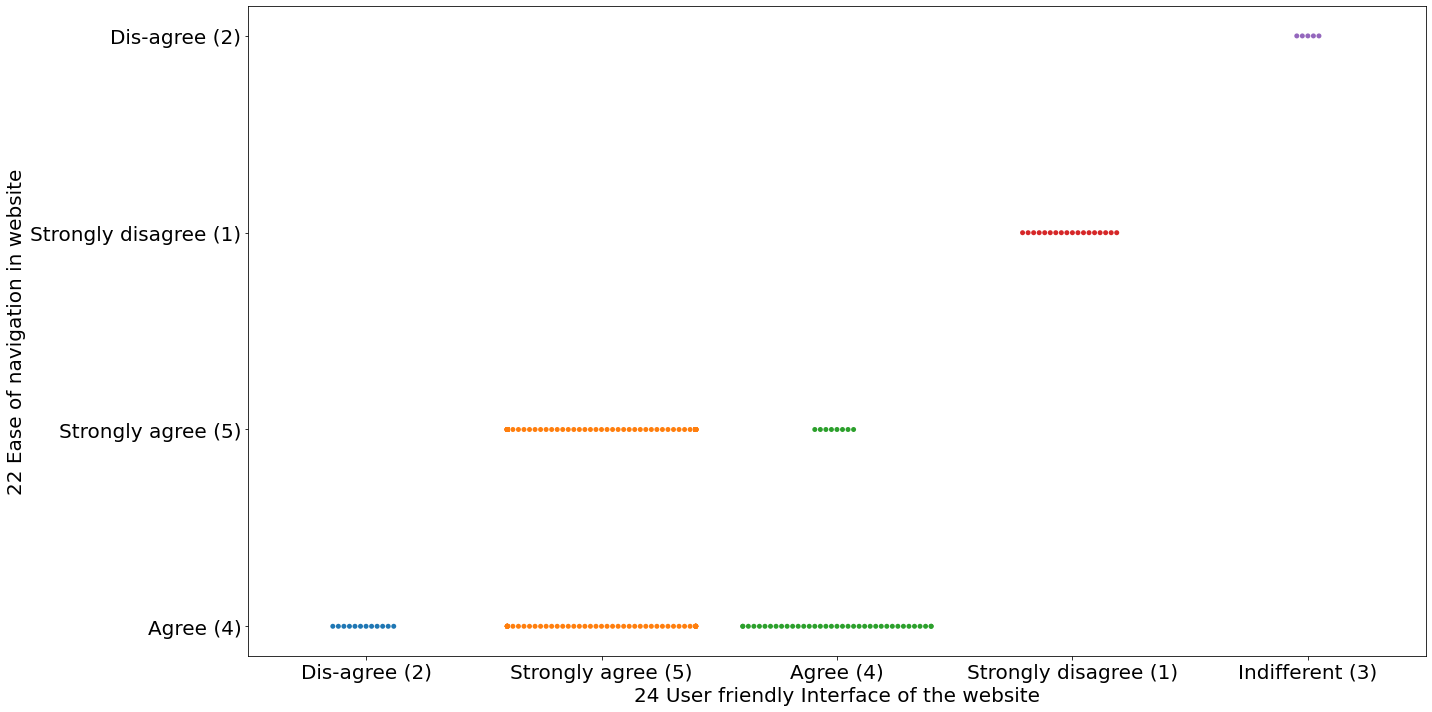

In [38]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df['24 User friendly Interface of the website'],y=df['22 Ease of navigation in website'])
plt.xlabel('24 User friendly Interface of the website',fontsize=20)
plt.ylabel('22 Ease of navigation in website',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()
plt.savefig('koko')

plt.show()

MAJORITY OF CUSTOMERS STRONGLY AGREE TO TH FACT THAT USERFRIENDLYNESS AND EASE OF NAVIGATION THROUGH THE WEBSITES HELP IN BETTER PURCHASE DECISION

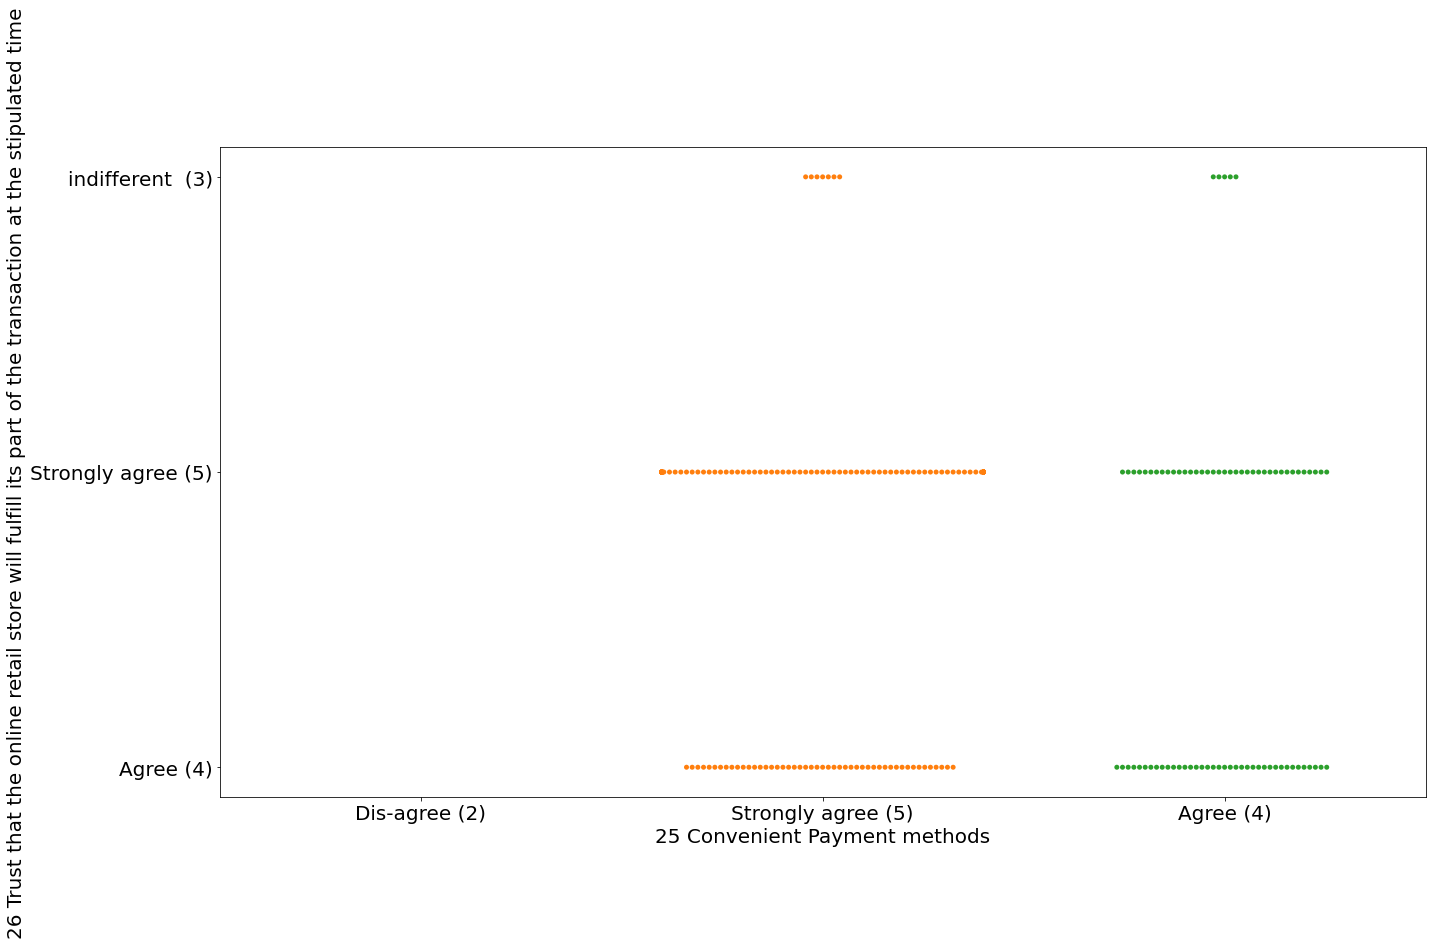

In [39]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df['25 Convenient Payment methods'],y=df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'])
plt.xlabel("25 Convenient Payment methods",fontsize=20)
plt.ylabel("26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time",fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()
plt.savefig("jaaj")
plt.show()

NOBODY DISAGREES TO THE FACT THAT CONVINIENT PAYMENT METHODS AND TRUST THAT THE ONLINE RETAIL STORE WILL FULFILL ITS PART OF THE TRANSACTION AT THE STIPULATED TIME ARE IMPORTANT PARAMETERS WHICH DECIDES A PURCAHSE FROM THAT E STORE

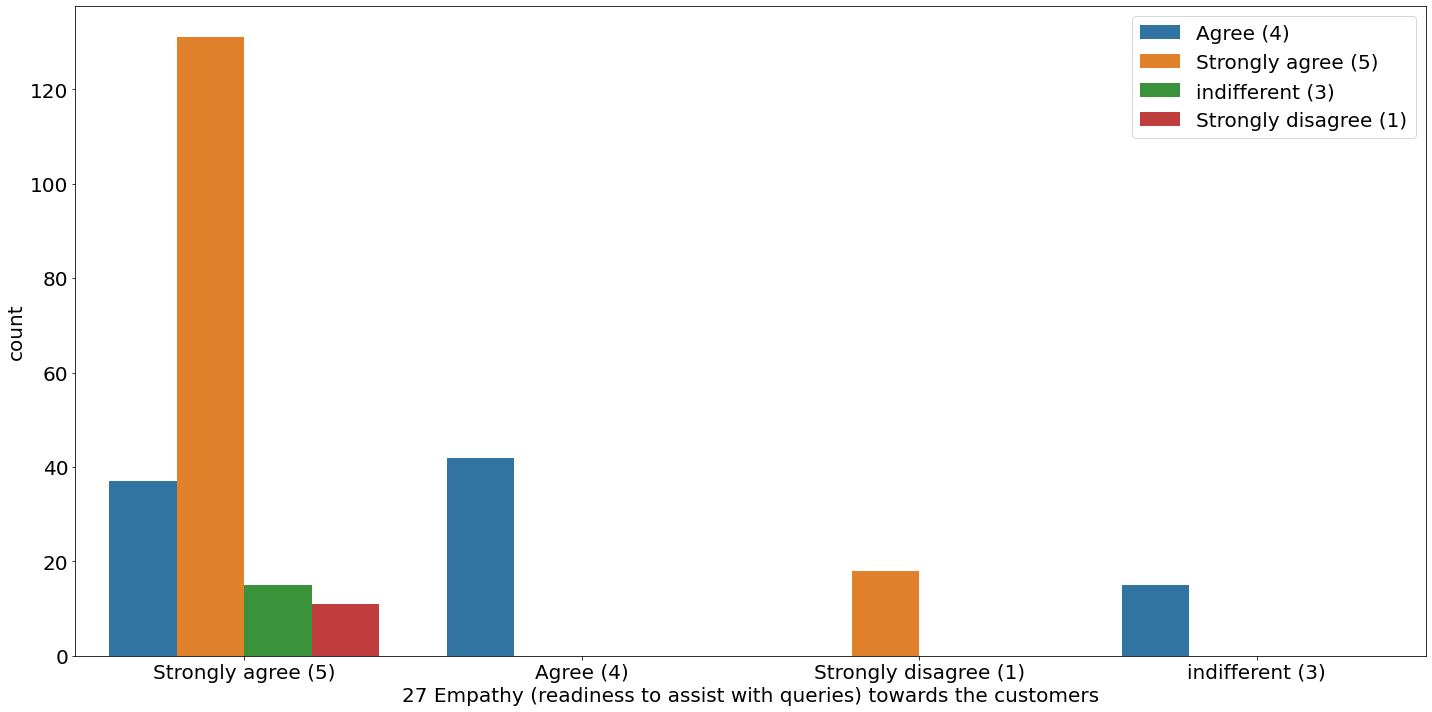

In [40]:
plt.figure(figsize=(20,10))
plt.xlabel('27 Empathy (readiness to assist with queries) towards the customers',fontsize=20)
plt.ylabel("count",fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
sns.countplot(df['27 Empathy (readiness to assist with queries) towards the customers'],hue=df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'])
plt.legend(loc="upper right",fontsize=20)
plt.tight_layout()
plt.savefig('poo')
plt.show()

MOST PEOPLE STRONGLY AGREE TO THE FACT THAT EMPATHY TOWARDS THE CUSTOMER AND RESPONSIVENESS,AVAILABILITY OF SEVERAL COMMUNICATION CHANNELS PLAYS A KEY ROLE IN DECIDING A PURCAHSE MADE

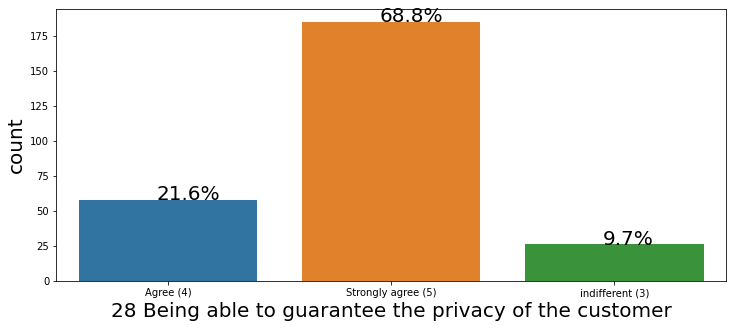

In [41]:
plt.figure(figsize=(12,5))
ax=sns.countplot(df['28 Being able to guarantee the privacy of the customer'])
plt.xlabel("28 Being able to guarantee the privacy of the customer",fontsize=20)
plt.ylabel("count",fontsize=20)
without_hue(ax,df['28 Being able to guarantee the privacy of the customer'])
plt.savefig("qwe")
plt.show()

----TAKE ON PRIVACY BY SEVERAL CUSTOMERS------------------- 

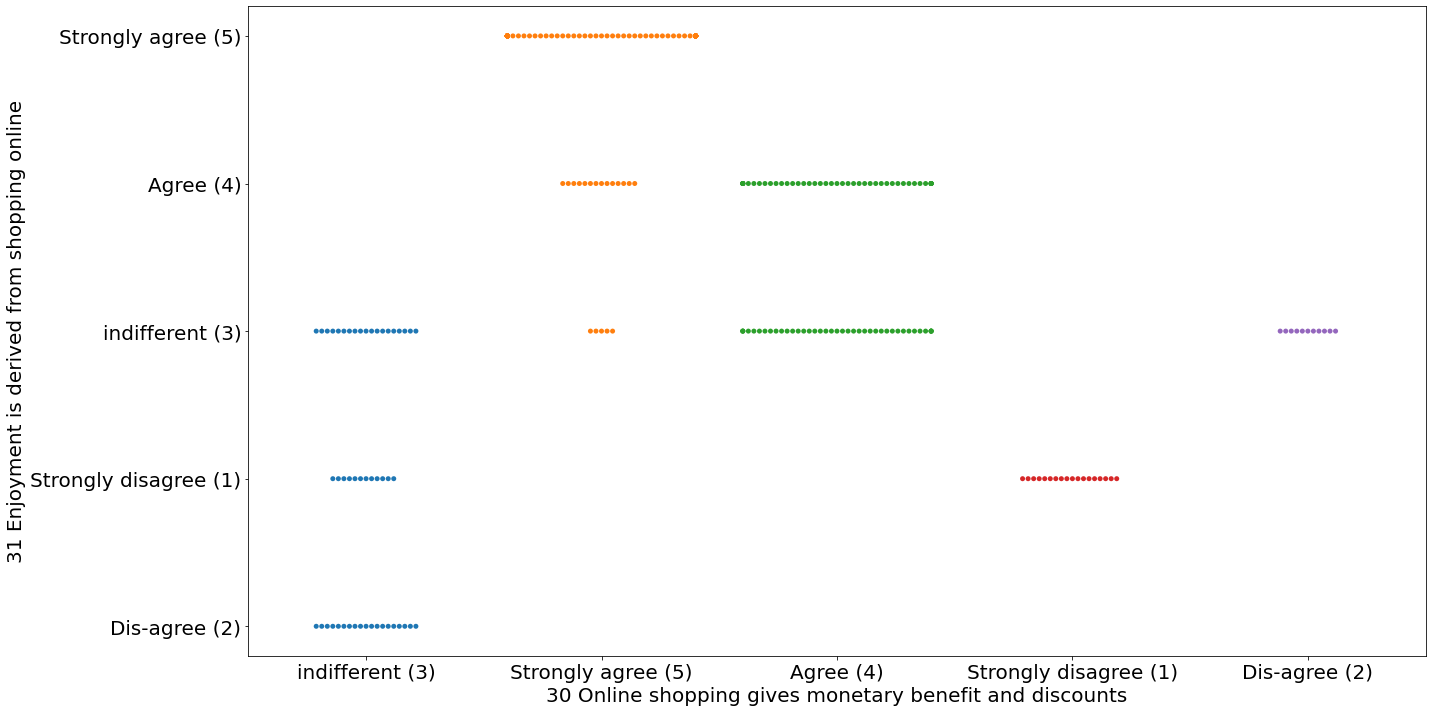

In [42]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df['30 Online shopping gives monetary benefit and discounts'],y=df['31 Enjoyment is derived from shopping online'])
plt.xlabel('30 Online shopping gives monetary benefit and discounts',fontsize=20)
plt.ylabel('31 Enjoyment is derived from shopping online',fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()
plt.savefig('eee')
plt.show()

MAJORITY OF CUSTOMERS AGREE TO THE FACT THAT ENJOYMENT IS DERIVED IN ONLINE SHOPPING WHEN ONLINE SHOPPING GIVES MONETARY BENEFITS AND DISCOUNTS

In [43]:
df['34 Gaining access to loyalty programs is a benefit of shopping online']

0                  Agree (4)
1         Strongly agree (5)
2         Strongly agree (5)
3            indifferent (3)
4              Dis-agree (2)
5         Strongly agree (5)
6         Strongly agree (5)
7         Strongly agree (5)
8                  Agree (4)
9                  Agree (4)
10     Strongly disagree (1)
11                 Agree (4)
12        Strongly agree (5)
13           indifferent (3)
14        Strongly agree (5)
15           indifferent (3)
16             Dis-agree (2)
17        Strongly agree (5)
18        Strongly agree (5)
19           indifferent (3)
20             Dis-agree (2)
21        Strongly agree (5)
22                 Agree (4)
23                 Agree (4)
24     Strongly disagree (1)
25                 Agree (4)
26        Strongly agree (5)
27           indifferent (3)
28        Strongly agree (5)
29           indifferent (3)
30             Dis-agree (2)
31                 Agree (4)
32        Strongly agree (5)
33        Strongly agree (5)
34           i

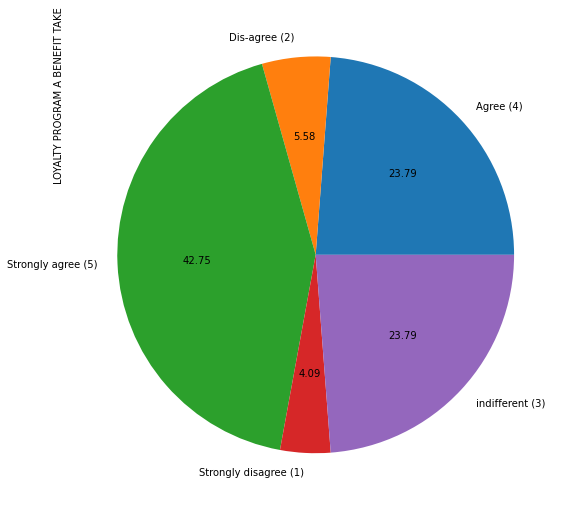

In [44]:
fig,ax1=plt.subplots(nrows=1,ncols=1,figsize=(8,8))
df.groupby('34 Gaining access to loyalty programs is a benefit of shopping online').size().plot(kind='pie',autopct='%.2f',ax=ax1,textprops={'fontsize': 10})
plt.ylabel('LOYALTY PROGRAM A BENEFIT TAKE',fontsize=10,loc='top')
plt.savefig('laddo')
plt.tight_layout()
plt.show()

AROUND 42.75 % OF POPULATION OF CUSTOMERS AGREES TO THE FACT THAT GAINING ACCESS TO LOYALTY PROGRAM IS A BENEFIT OF ONLINE SHOPPING

ITS QUIET OBVIOUS FROM THE COUNT PLOT THAT USER SATISFRACTION CANNOT EXIST WITHOUT TRUST

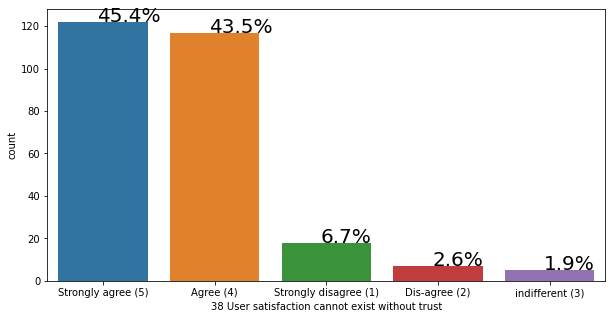

In [45]:
plt.figure(figsize=(10,5))
ax=sns.countplot(df['38 User satisfaction cannot exist without trust'])
without_hue(ax,df['38 User satisfaction cannot exist without trust'])
plt.savefig('kaka')
plt.show()

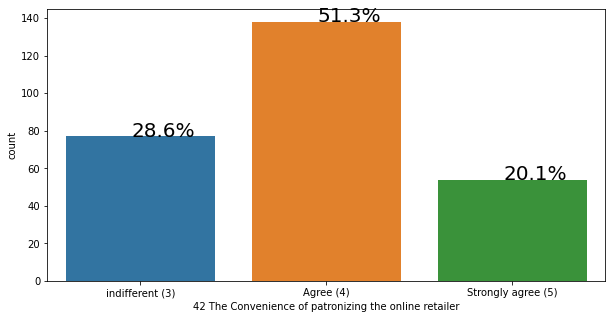

In [46]:
plt.figure(figsize=(10,5))
ax=sns.countplot(df['42 The Convenience of patronizing the online retailer'])
without_hue(ax,df['42 The Convenience of patronizing the online retailer'])
plt.savefig('kuy')
plt.show()

QUIET MIXED CHECKS FOR THIS QUERY AS POPULATION WHO THINKS ITS INDIFFERENT AND STRONLY AGREE ARE ALMOST SAME

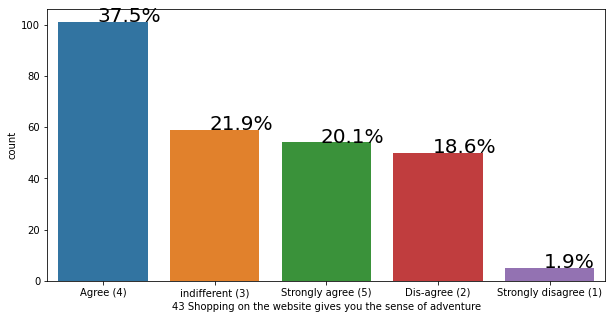

In [47]:
plt.figure(figsize=(10,5))
ax=sns.countplot(df['43 Shopping on the website gives you the sense of adventure'])
without_hue(ax,df['43 Shopping on the website gives you the sense of adventure'])
plt.savefig('zxc')
plt.show()

MAXIMUM NUMBER OF PEOPLE AGREE TO THE FACT THAT THERE IS A KIND OF ADVENTURE WHEN IT COMES TO ONLINE SHOPPING

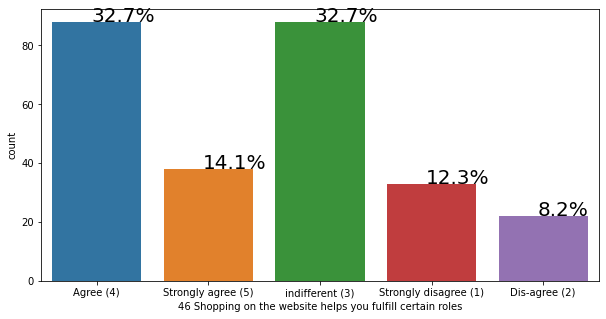

In [48]:
plt.figure(figsize=(10,5))
ax=sns.countplot(df['46 Shopping on the website helps you fulfill certain roles'])
without_hue(ax,df['46 Shopping on the website helps you fulfill certain roles'])
plt.savefig('qaz')
plt.show()

QUIET MIXED REVIEWS IN THIS QUERY TOO AS THE PLOT SHOWS CUSTOMERS WHO AGREE TO THE FACT THAT WEBSITES HELPS FULFIL CERTAIN ROLES IS ALMOST EQUAL TO CUSTOMERS WHO FEEL ITS INDIFFERNET AT SOME OF POINT AND ITS UNRELATED

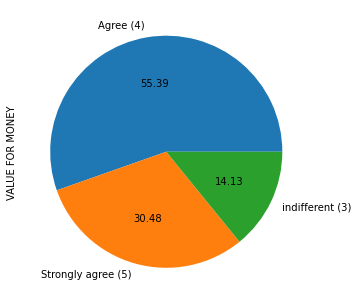

In [49]:
fig,ax1=plt.subplots(nrows=1,ncols=1,figsize=(5,5))
df.groupby('47 Getting value for money spent').size().plot(kind='pie',autopct="%.2f",ax=ax1)
ax1.set_ylabel('VALUE FOR MONEY',loc='center')
fig.savefig('hvb')
plt.tight_layout()
plt.show()

AROUND 56.39% OF CUSTOMERS FEELS LIKE THERE IS A VALUE FOR MONEY AND 14.13 PERCENT OF PEOPLE THINKS THATS ITS UNRELATED TO EACH OTHER AND CANT BE LINKED

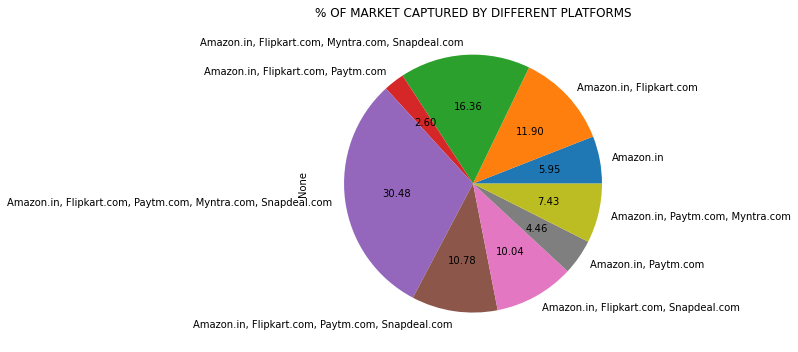

In [50]:
fig,ax1=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
df.groupby('From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ').size().plot(kind='pie',autopct="%.2f",ax=ax1)
plt.title('% OF MARKET CAPTURED BY DIFFERENT PLATFORMS')
plt.savefig('kkk')
plt.tight_layout()
plt.show()

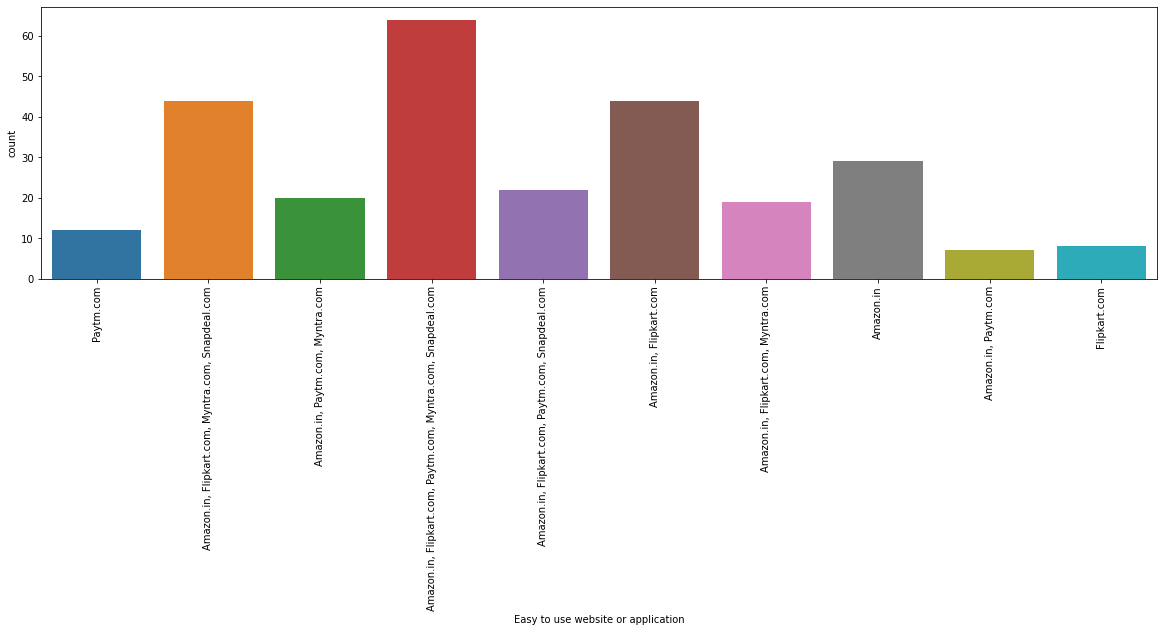

In [51]:
plt.figure(figsize=(20,5))
sns.countplot(df['Easy to use website or application'])
plt.xticks(rotation=90)
plt.show()


AS WE CAN SEE AMAZON TENDS TO HAVE MORE EASY TO USE WEBSITE AS COMPARED TO PATYM FOLLOWING FLIPKART<BR>
    AMAZON ,FLIPKART TOGETHER CONTRIBTES A  LOT WHWN IT COMES TO EASY TO USE WEBSITE OR APPLICATION

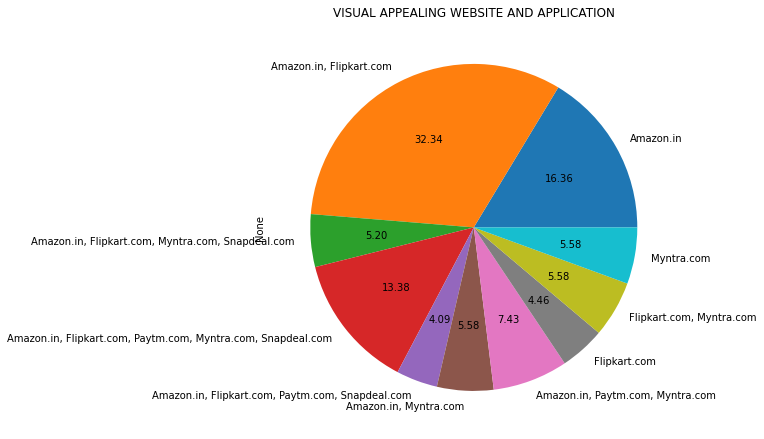

In [52]:
fig,ax1=plt.subplots(ncols=1,nrows=1,figsize=(10,10))
df.groupby('Visual appealing web-page layout').size().plot(kind='pie',autopct='%.2f', textprops={'fontsize': 10},ax=ax1)
plt.title('VISUAL APPEALING WEBSITE AND APPLICATION')
plt.savefig('vaw')
plt.tight_layout()
plt.show()

AROUND 16% OF PEOPLE THINKS THAT AMAZON DOES IT BETTER WHEN IT COMES TO VISAUL APPEALING WEBSITE THEN COMES MYNTRA WHO IS FURTHER FOLLOWED BY FLIPKART<BR>
AND ALMOST 32.34% OF POPULATION BELIEIVES THAT AMAZON AND FLIPAKRT ARE BOTH GOOD WHEN IT COMES TO VISYAL APPEALING WEBSITE AND APPLICATION


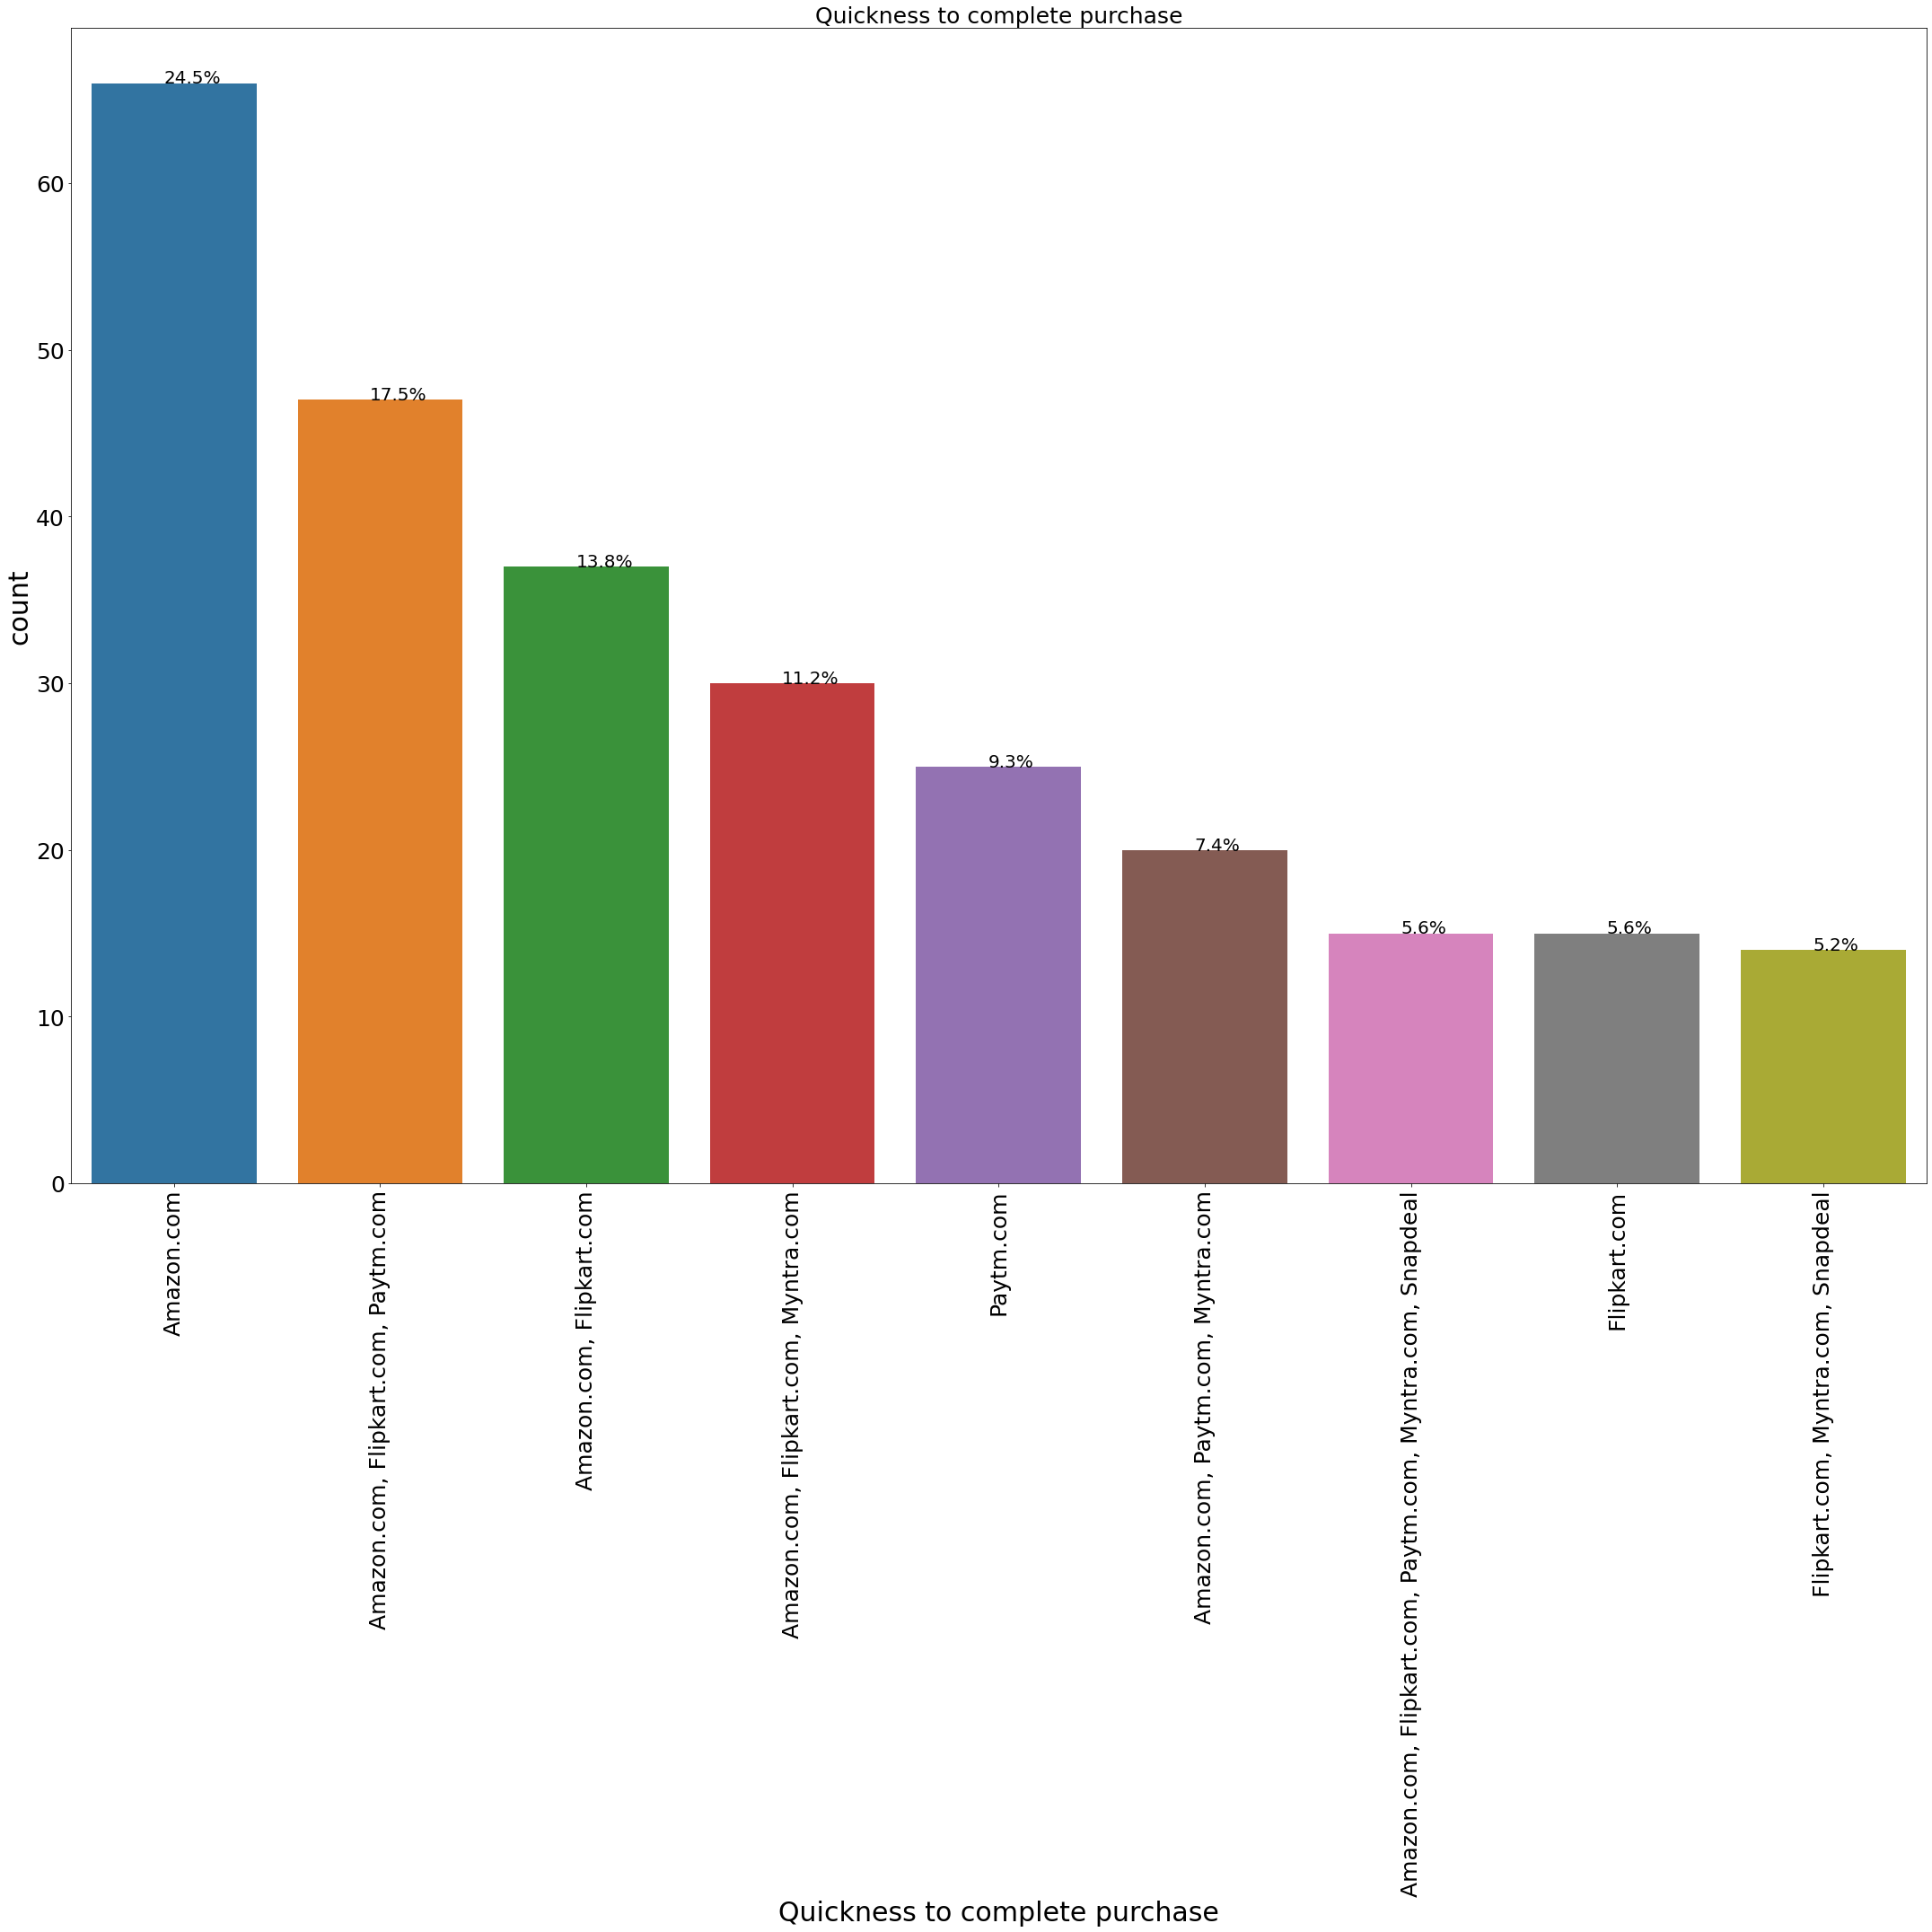

In [53]:
plt.figure(figsize=(30,30))
ax=sns.countplot(x=df['Quickness to complete purchase'],order=df['Quickness to complete purchase'].value_counts().index)
plt.xlabel('Quickness to complete purchase',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(size=25,rotation=90)
plt.yticks(size=25)
without_hue(ax,df['Quickness to complete purchase'])
plt.title('Quickness to complete purchase',size=25)
plt.tight_layout()
plt.savefig('qtt')
plt.show()

AMAZON LEADS THE QUICKINESS TO PAYMENT WHO IS FOLLOWED BY PAYTM AND THEN FLIPKART WHEN WE TALK IN TERMS OF INDIVIDUALITY

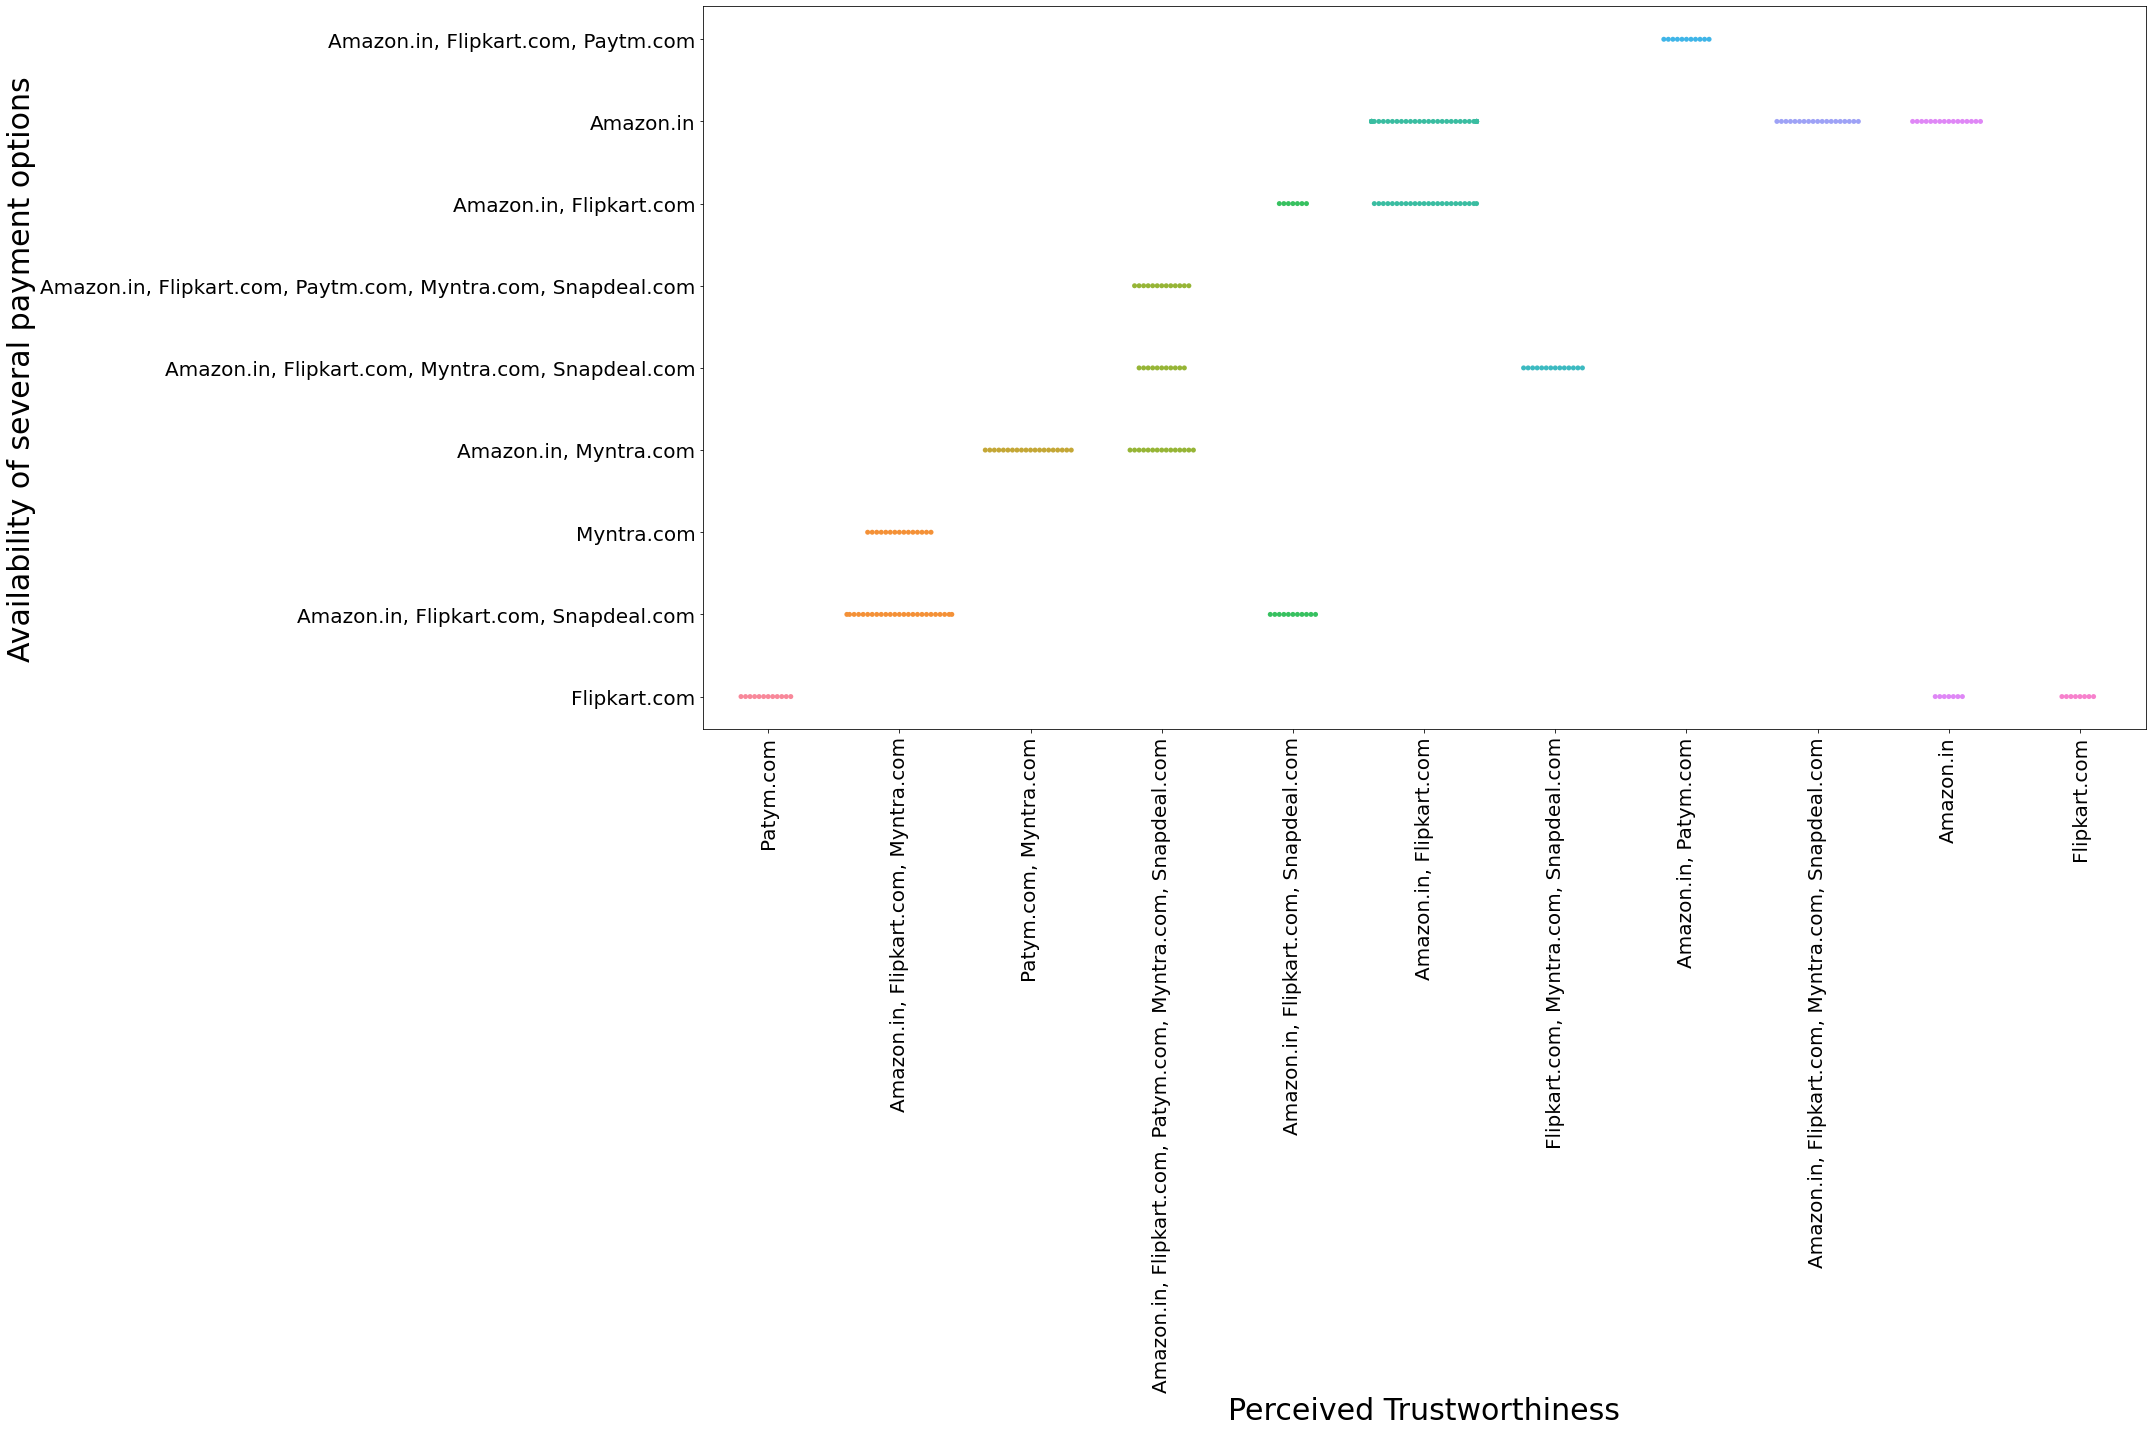

In [54]:
plt.figure(figsize=(30,20))
sns.swarmplot(x=df['Availability of several payment options'],y=df['Perceived Trustworthiness'])
plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
plt.ylabel('Availability of several payment options',fontsize=30)
plt.xlabel('Perceived Trustworthiness',fontsize=30)
plt.tight_layout()
plt.savefig('ghg')
plt.show()

AMAZON ALONE AND AMAZON AND FLIPKART BOTH COMBINED TOGETHER HAVE ALMOST SAME LEVELS OF PERCIEVED TRUSTORTHINESS WITH INCREASE OF AVAILABILITY OF PAYMENT OPTION

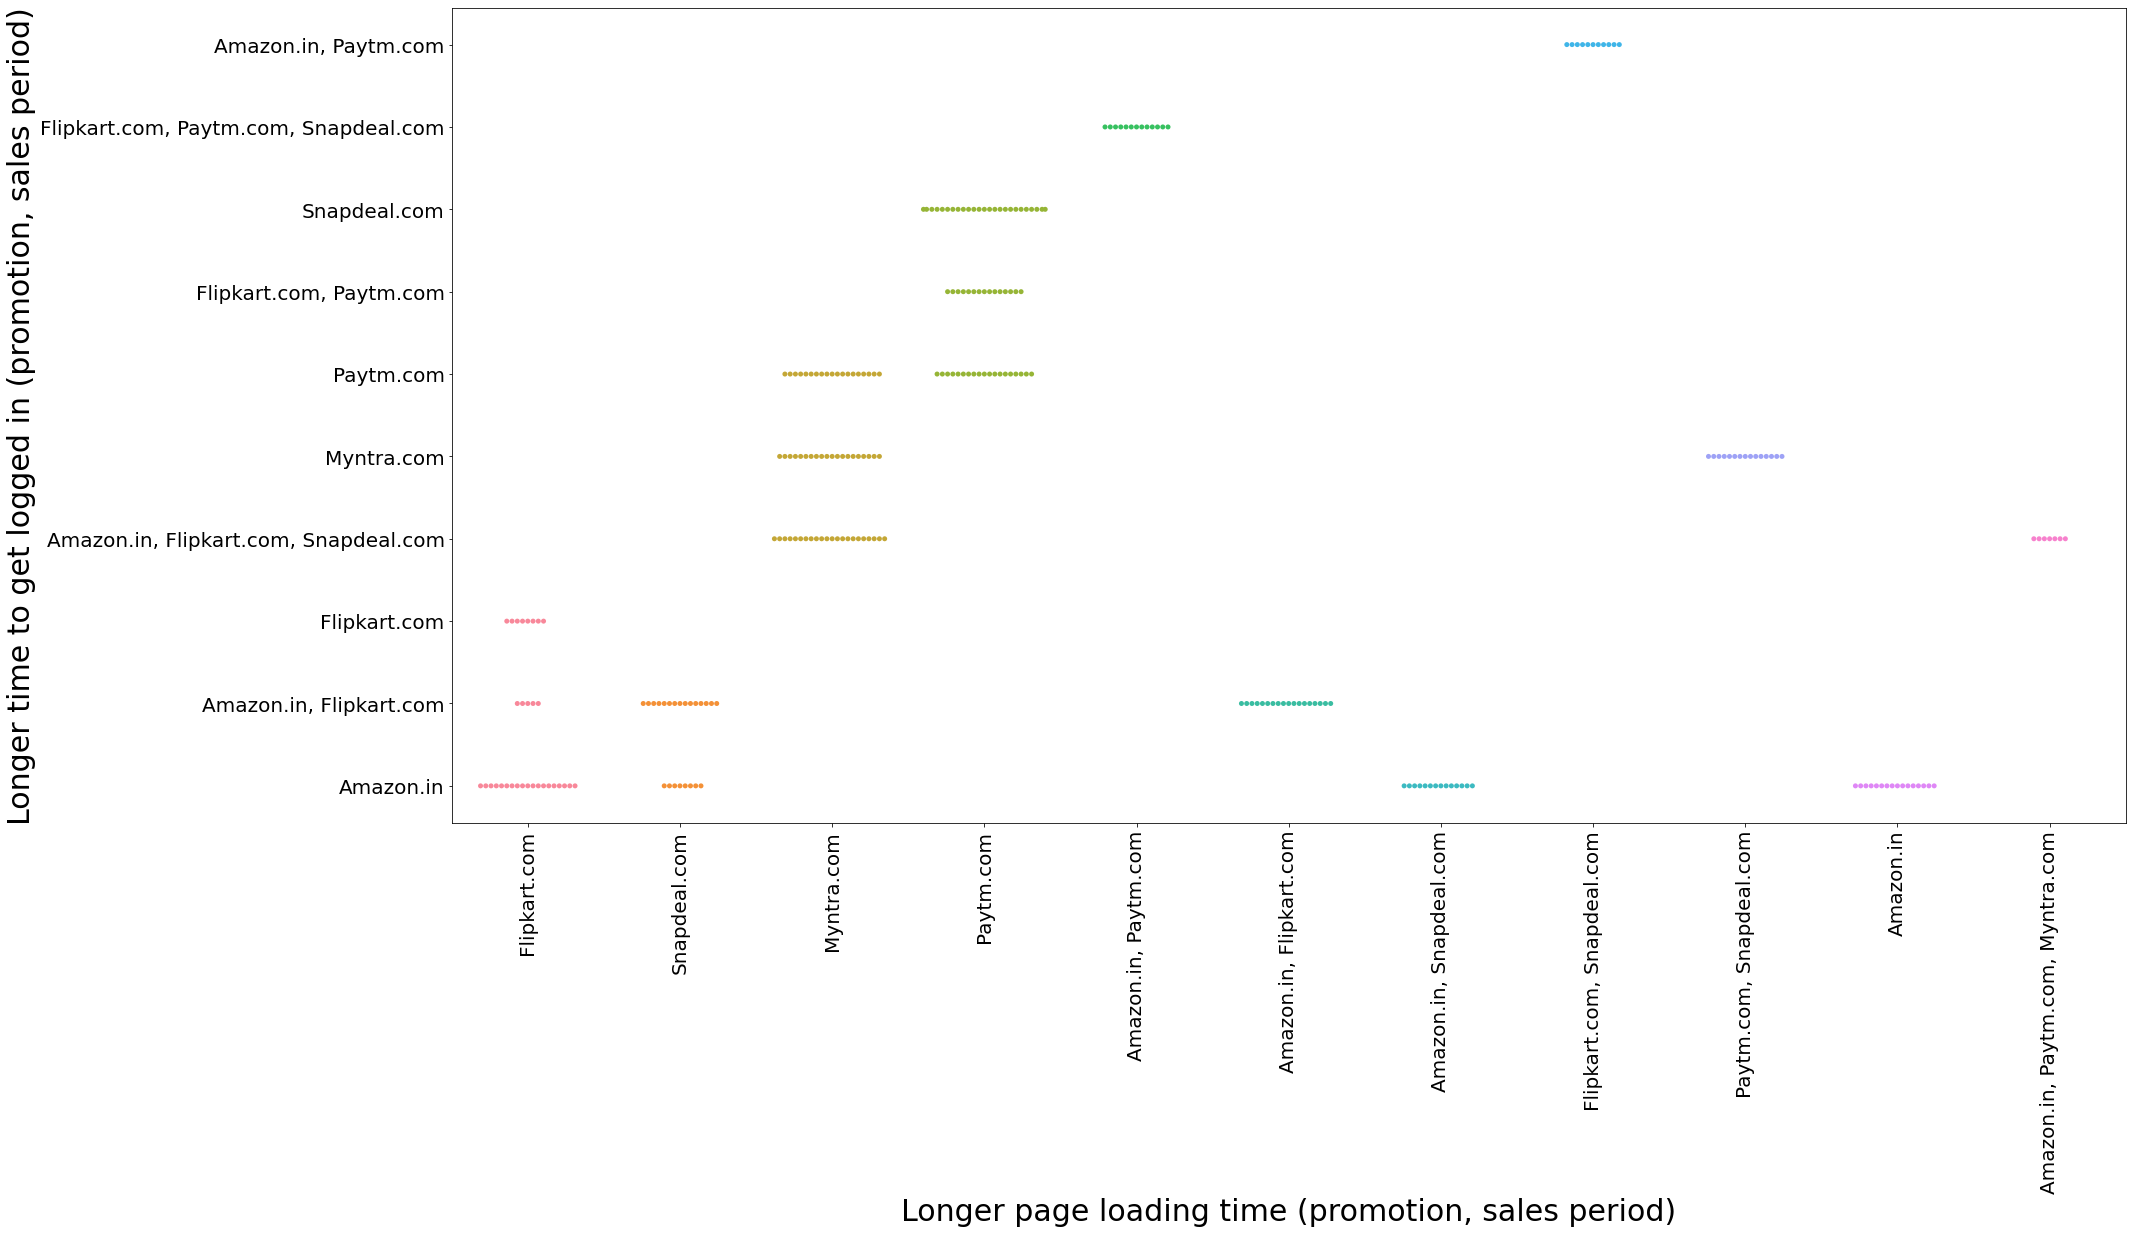

In [55]:
plt.figure(figsize=(30,15))
sns.swarmplot(x=df['Longer page loading time (promotion, sales period)'],y=df['Longer time to get logged in (promotion, sales period)'])
plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
plt.ylabel('Longer time to get logged in (promotion, sales period)',fontsize=30)
plt.xlabel('Longer page loading time (promotion, sales period)',fontsize=30)
plt.show()

MYNTRA HAVE QUIET LONGER PAGE LOADING TIME AS WELL AS LONGER TIME TO GET LOGGED IN SAME WITH THE PAYTM

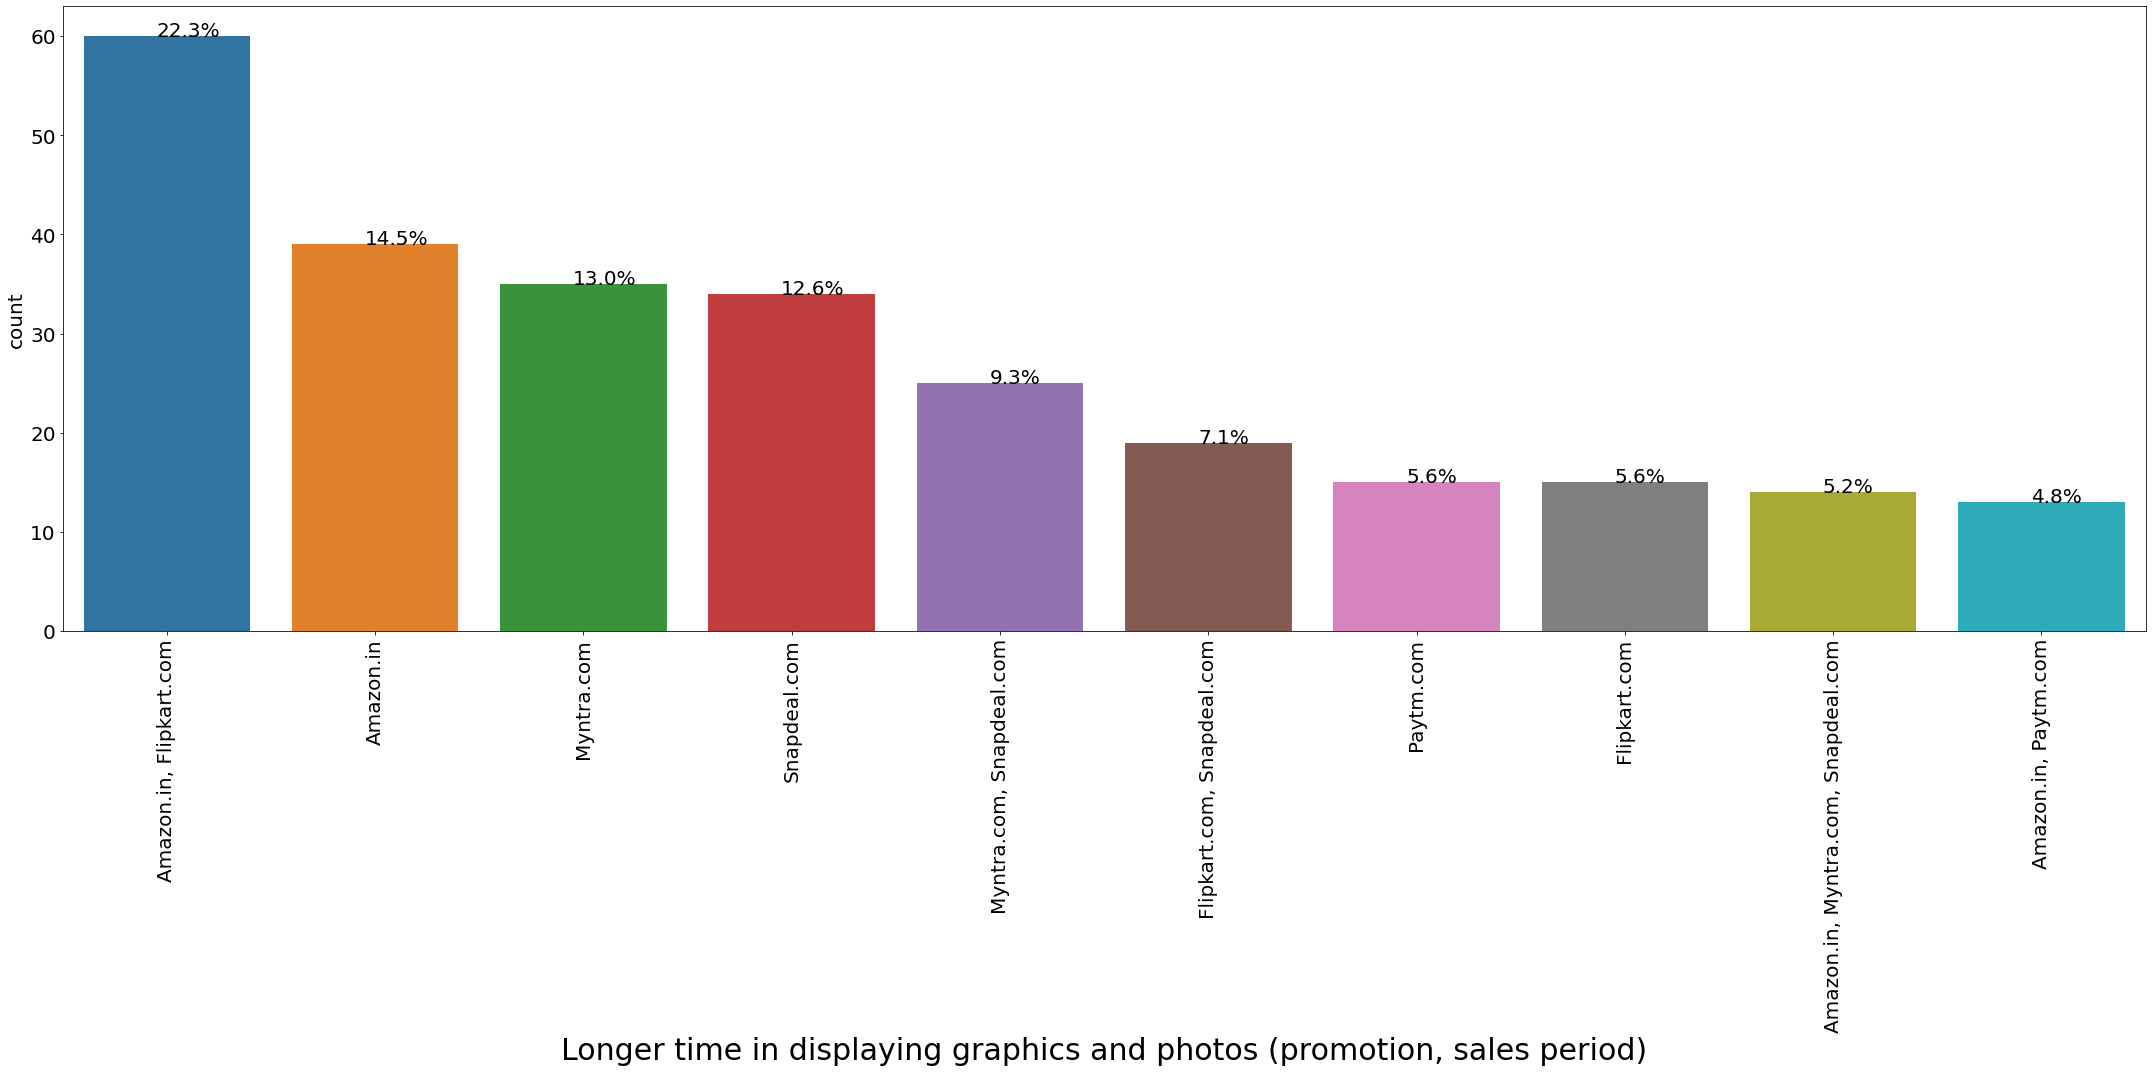

In [56]:
plt.figure(figsize=(30,15))
ax=sns.countplot(x=df['Longer time in displaying graphics and photos (promotion, sales period)'],order=df['Longer time in displaying graphics and photos (promotion, sales period)'].value_counts().index)
plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
plt.xlabel('Longer time in displaying graphics and photos (promotion, sales period)',fontsize=30)
plt.ylabel('count',fontsize=20)
without_hue(ax,df['Longer time in displaying graphics and photos (promotion, sales period)'])
plt.tight_layout()
plt.savefig('dfd')
plt.show()

MOST PEOPLE TICKED AMAZON AND FLIPKART WHEN IT COMES TO LONGER TIME IN DISPLAYING GRAPHICS AND PHOTOS WHICH IS FOLLOWED BY AMAZON THEN MNTRA AND A VERY LITTELE DIFFERENCE BETWEEN MYNTRA AND SNAPDEAL<br>
paytm ,flipkart are almost same have better loading of graphics as compared

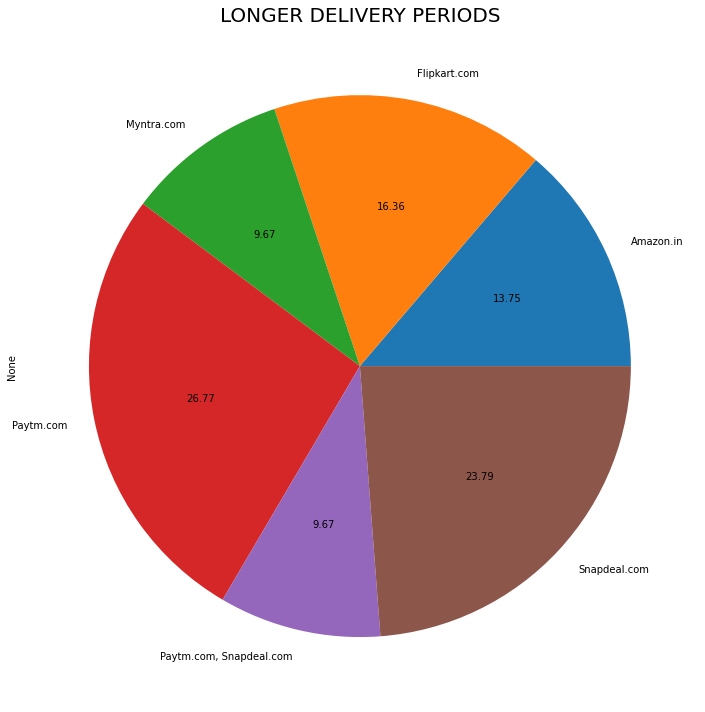

In [57]:
fig,ax1=plt.subplots(ncols=1,nrows=1,figsize=(10,10))
df.groupby('Longer delivery period').size().plot(kind='pie',autopct='%.2f', textprops={'fontsize': 10},ax=ax1)
plt.title('LONGER DELIVERY PERIODS',fontsize=20)
plt.savefig('oo')
plt.tight_layout()
plt.show()

AS WE CAN SEE PAYTM IS HAVING SOME KIND OF ISSUE WITH THE DELIVERY METHODS OR SYSTEM AND CONSTITUTE AROUNF 26.77 % FOLLOWED BY SNAPDEAL THEN COMES AMAZON,
MYNTRA IS QUIET GOOD WHEN IT COMES TO QUICK DELIVERIES AS IT  CONSTITUES A SMALL PORTION IN PIE CHART 

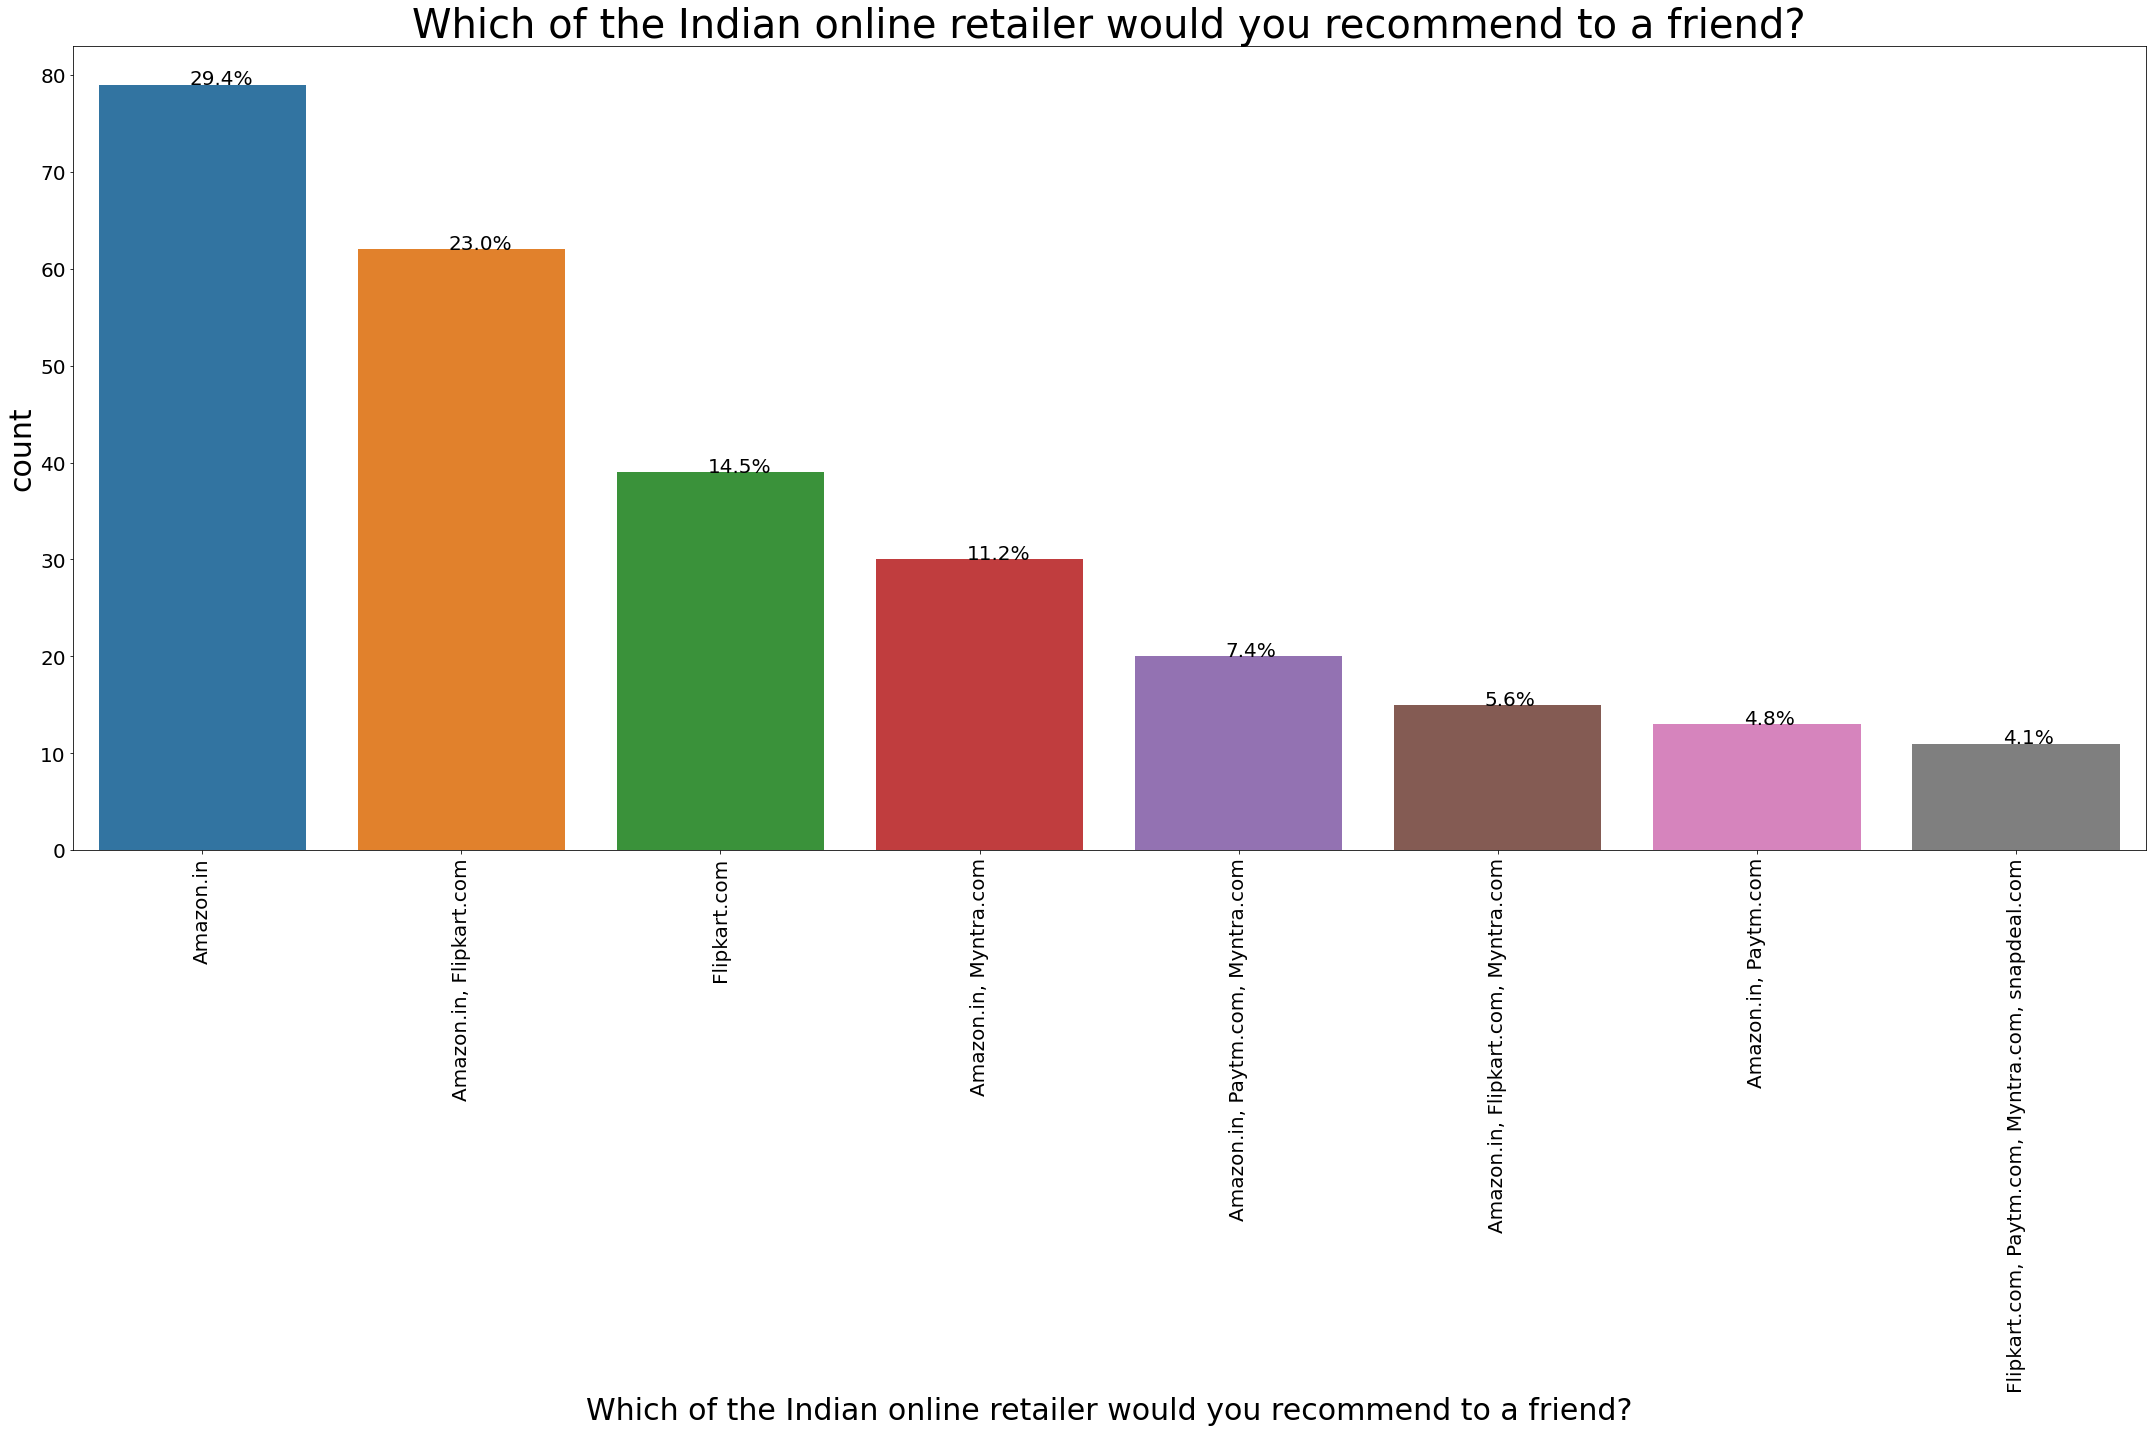

In [58]:
plt.figure(figsize=(30,20))
ax=sns.countplot(x=df['Which of the Indian online retailer would you recommend to a friend?'],order=df['Which of the Indian online retailer would you recommend to a friend?'].value_counts().index)
plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
plt.title('Which of the Indian online retailer would you recommend to a friend?',fontsize=40)
plt.ylabel('count',size=30)
plt.xlabel('Which of the Indian online retailer would you recommend to a friend?',fontsize=30)
without_hue(ax,df['Which of the Indian online retailer would you recommend to a friend?'])
plt.tight_layout()
plt.savefig('rrr')
plt.show()

AMAZON LEADS WHEN IT COMES TO REFERALS THEN FLIPKART WHICH I FOLLOWWED BY MULTIPLE TCIKS AND COMBINATIONS

ALL THE OBSERVATIONS ARE FURTHER DESCRIBED IN THE PPT ATTACHED !!!
----------------------------